# Analyse des Schweizer Wohnimmobilienmarkts und der Lohnentwicklung (2015–2030)

**Studiengang:**  
Msc. Wirtschaftsinformatik   
**Modul:**  
Business Intelligence & Analytics  
**Autoren:**   
Emir Esati, Halim Sadiku, Nikola Acimovic, Aravin Sritharan




## Executive Summary


Diese Studie untersucht die Entwicklungen und Zusammenhänge zwischen Immobilienpreisen, Zinssätzen und Reallöhnen in der Schweiz im Zeitraum von 2015 bis 2025, mit einer modellbasierten Projektion bis 2030. Ziel ist es, datenbasierte Entscheidungsgrundlagen für wirtschaftliche und politische Akteure bereitzustellen.

Die zentralen Ergebnisse lassen sich wie folgt zusammenfassen:

- **Zinssätze zeigen einen starken Einfluss auf Immobilienpreise.** Die Korrelation zwischen dem Leitzins der Schweizerischen Nationalbank (SNB) und dem Preisindex beträgt 0.76. Ein lineares Regressionsmodell erklärt damit über 55 % der Preisvarianz (R² = 0.5547).

- **Reallöhne haben einen nur geringen Einfluss auf die Preisentwicklung.** Eine schwach negative Korrelation von –0.37 weist auf eine zunehmende Entkopplung von Einkommen und Immobilienwerten hin.

- **Die Preisvolatilität hat nach 2022 deutlich zugenommen.** Insbesondere die Jahre 2023 bis 2025 zeigen erhöhte Schwankungen, was auf geldpolitische und geopolitische Unsicherheiten zurückzuführen ist.

- **Zeitverzögerte Effekte wurden identifiziert.** Die Analyse zeigt, dass Zinsänderungen mit einer Verzögerung von ein bis zwei Quartalen auf die Preisentwicklung wirken.

- **Konkrete Handlungsempfehlungen lassen sich ableiten,** darunter die Anpassung geldpolitischer Massnahmen, strategisches Timing von Investitionen, frühzeitige Risikoidentifikation und die Ausgestaltung sozialpolitischer Instrumente zur Förderung von Wohneigentum.

## Vorgehen

Als methodische Grundlage wird das CPA-Rahmenwerk «From Data to Decisions» verwendet. Dieses beschreibt einen strukturierten Analyseprozess in fünf Schritten: Zieldefinition, Datensammlung, Datenanalyse, Informationsaufbereitung und Entscheidungsfindung (Chartered Professional Accountants Canada, 2020).

Die Struktur dieser Arbeit orientiert sich an den ersten vier Schritten des CPA-Rahmenwerks. Die Kapitel folgen einer klaren Abfolge:

1. Definition von Zielen und Informationsbedarf
2. Datensammlung
3. Datenanalyse
4. Präsentation der Informationen


## Einleitung

Der Schweizer Immobilienmarkt ist in den letzten Jahren zunehmend in den Fokus wirtschaftlicher und politischer Analysen gerückt. Angesichts anhaltend niedriger Zinsen, steigender Immobilienpreise und stagnierender Realeinkommen stellt sich die Frage, welche makroökonomischen Faktoren die Preisbildung massgeblich beeinflussen und welche Schlussfolgerungen sich daraus für Politik, Investoren und Bauwirtschaft ableiten lassen.

Diese Arbeit untersucht die Entwicklung von Einfamilienhauspreisen in der Schweiz im Zeitraum von 2015 bis 2025 sowie deren Verhältnis zu zwei zentralen Einflussgrössen: dem Leitzins der SNB und den Reallöhnen laut Bundesamt für Statistik (BFS). Aufbauend auf der Vergangenheitsanalyse wird eine Projektion bis 2030 vorgenommen.

Ziel ist es, fundierte Erkenntnisse über Ursache-Wirkungs-Zusammenhänge zu gewinnen, Zeitverzögerungen zu identifizieren und daraus datengestützte Handlungsempfehlungen für verschiedene Zielgruppen abzuleiten.

Die Arbeit folgt einem fünfstufigen Analysemodell (CPA-Modell): Kontextdefinition, Datenverarbeitung, Analyse, Visualisierung und Ableitung von Empfehlungen. Dabei kommen quantitative Verfahren wie Korrelation, Regression, Residuenanalyse und Zeitverzugsmodelle zum Einsatz. Ergänzt wird die Analyse durch eine Vielzahl von Visualisierungen und ein abschliessendes Mini-Dashboard.


In [501]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm


## Datenquellen und Transparenz

Für diese Analyse wurden ausschliesslich öffentlich zugängliche, amtliche Datensätze verwendet. Die Daten decken den Zeitraum von 2015 bis einschliesslich des ersten Quartals 2025 ab und stammen von der Schweizerischen Nationalbank (SNB) sowie vom Bundesamt für Statistik (BFS).

- **Immobilienpreise**: Die Preisentwicklung von Einfamilienhäusern basiert auf dem offiziellen Immobilienpreisindex der SNB. Verwendet wurde die Auswahl `D0='EW'` (Einfamilienhäuser) und `D1='TP'` (Transaktionspreise).  
  Quelle: [SNB Real Estate Price Index](https://data.snb.ch/en/topics/uvo/cube/plimoinchq)  
  Dateiname: `snb-data-plimoinchq-en-selection-20250422_0900.csv`

- **Zinssätze**: Die offiziellen Leitzinssätze der SNB wurden auf Quartalsbasis aggregiert. Die verwendete Dimension `D0='OG1'` bezieht sich auf den SNB-Leitzins (Overnight Geldmarktsatz).  
  Quelle: [SNB Official Interest Rates](https://data.snb.ch/en/topics/snb/cube/snboffzisa)  
  Dateiname: `snb-data-snboffzisa-en-selection-20250422_0900.csv`

- **Reallöhne**: Die Löhne stammen vom Bundesamt für Statistik und umfassen den aggregierten Reallohn für die gesamte Bevölkerung (`SEX='T'`, `WAGE_TYPE='R'`). Die Daten liegen als Jahreswerte vor und wurden für die Analyse auf Quartalsbasis interpoliert.  
  Quelle: [BFS Reallohnstatistik](https://www.bfs.admin.ch/bfs/en/home/statistics/work-income/wages-income-employment-labour-costs.html)  
  Dateiname: `ts-x-03.04.03.02.01.csv`

Die Datensätze wurden hinsichtlich Zeitachse, Struktur und Einheitlichkeit harmonisiert und anschliessend in einen gemeinsamen Analyse-Datensatz überführt.

In [502]:
# Raw-Links zu GitHub-Dateien
real_estate_url = 'https://raw.githubusercontent.com/EmEs2000G/BINA_FS2025/refs/heads/main/data/snb-data-plimoinchq-en-selection-20250422_0900.csv'
interest_rate_url = 'https://raw.githubusercontent.com/EmEs2000G/BINA_FS2025/refs/heads/main/data/snb-data-snboffzisa-en-selection-20250422_0900.csv'
wages_url = 'https://raw.githubusercontent.com/EmEs2000G/BINA_FS2025/refs/heads/main/data/ts-x-03.04.03.02.01.csv'

# CSV-Dateien einlesen
real_estate_df = pd.read_csv(real_estate_url)
interest_rates_df = pd.read_csv(interest_rate_url)
wages_df = pd.read_csv(wages_url)

# Vorschau
print("Real Estate Data:")
display(real_estate_df.head())

print("\nInterest Rate Data:")
display(interest_rates_df.head())

print("\nWages Data:")
display(wages_df.head())


Real Estate Data:


,"CubeId;""plimoinchq"""
0,"PublishingDate;""2025-04-22 09:00"""
1,"Date;""D0"";""D1"";""Value"""
2,"2015-Q1;""EW"";""TP3"";"
3,"2015-Q1;""EW"";""TP1"";""208.29763907"""
4,"2015-Q1;""EW"";""TP2"";""178.85574672"""



Interest Rate Data:


,"CubeId;""snboffzisa"""
0,"PublishingDate;""2025-04-22 09:00"""
1,"Date;""D0"";""Value"""
2,"2015-03;""LZ"";"
3,"2015-03;""UG1"";""0"""
4,"2015-03;""OG1"";""0.25"""



Wages Data:


,YEAR,SEX,WAGE_TYPE,VALUE,VALUE_P,CPI,OBS_STATUS_VALUE
0,1942,T,N,125,7.8,12.8,E
1,1942,M,N,125,7.8,12.8,E
2,1942,W,N,127,7.8,12.8,E
3,1942,T,R,87,-4.5,12.8,E
4,1942,M,R,87,-4.5,12.8,E


## Datenverarbeitung und Transformation

Die Ausgangsdaten für diese Analyse stammen aus drei unterschiedlichen Quellen: Immobilienpreisdaten der Schweizerischen Nationalbank (SNB), Zinssätze der SNB sowie Reallöhne des Bundesamts für Statistik (BFS). Da diese Daten in unterschiedlichen Formaten, Frequenzen und Strukturen vorlagen, war eine umfassende Datenbereinigung und Harmonisierung erforderlich.

**Ziel dieser Phase war es, alle Zeitreihen auf ein konsistentes Quartalsraster von 2015Q1 bis 2025Q1 zu bringen und sie für die kombinierte Analyse in einer gemeinsamen Tabelle zusammenzuführen.**

Folgende Schritte wurden dabei durchgeführt:

- **Immobiliendaten**:  
  Die Preisindizes wurden auf Einfamilienhäuser (`D0='EW'`) und Transaktionspreise (`D1='TP'`) gefiltert. Danach wurden die Datumsangaben standardisiert (Umwandlung in `PeriodIndex` im Quartalsformat) und fehlende Werte entfernt. Nur vollständige Zeitpunkte wurden beibehalten.

- **Zinssätze**:  
  Der SNB-Leitzins (`D0='OG1'`) lag im Monatsformat vor. Um diesen mit den anderen Variablen verknüpfen zu können, wurden Mittelwerte pro Quartal berechnet. Auch hier wurden nicht-numerische Werte behandelt und leere Einträge entfernt.

- **Reallöhne**:  
  Da die Reallöhne nur als Jahreswerte vorlagen, erfolgte eine Interpolation auf Quartalswerte mithilfe des sogenannten „forward-filling“-Verfahrens. Für das Jahr 2025 wurde ein statistischer Schätzwert (Konstantwert) ergänzt, um eine vollständige Vergleichbarkeit zu ermöglichen.

Am Ende dieser Transformation lag ein bereinigter, 41-zeiliger Datensatz mit einheitlicher Zeitachse (2015Q1–2025Q1) und drei konsistenten Variablen vor: `Price_Index`, `Interest_Rate` und `Real_Wage`. Dieser bildet die Grundlage für alle weiteren Analysen in dieser Arbeit.


In [503]:
# === Setup ===
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set renderer for Google Colab
pio.renderers.default = 'colab'

# === GitHub Raw-Links ===
real_estate_url = 'https://raw.githubusercontent.com/EmEs2000G/BINA_FS2025/refs/heads/main/data/snb-data-plimoinchq-en-selection-20250422_0900.csv'
interest_rate_url = 'https://raw.githubusercontent.com/EmEs2000G/BINA_FS2025/refs/heads/main/data/snb-data-snboffzisa-en-selection-20250422_0900.csv'
wages_url = 'https://raw.githubusercontent.com/EmEs2000G/BINA_FS2025/refs/heads/main/data/ts-x-03.04.03.02.01.csv'

# === CSV-Dateien laden ===
df_real_estate = pd.read_csv(real_estate_url, delimiter=';', encoding='latin1', skiprows=3)
df_real_estate.columns = ['Date', 'D0', 'D1', 'Price_Index']
df_real_estate = df_real_estate[(df_real_estate['D0'] == 'EW') & (df_real_estate['D1'] == 'TP')].copy()
df_real_estate['Date'] = df_real_estate['Date'].str.replace('-Q', 'Q')
df_real_estate['Date'] = pd.PeriodIndex(df_real_estate['Date'], freq='Q')
df_real_estate['Price_Index'] = pd.to_numeric(df_real_estate['Price_Index'], errors='coerce')
df_real_estate = df_real_estate.dropna(subset=['Price_Index', 'Date'])[['Date', 'Price_Index']]

df_interest = pd.read_csv(interest_rate_url, delimiter=';', encoding='latin1', skiprows=3)
df_interest.columns = ['Date', 'D0', 'Value']
df_interest = df_interest[df_interest['D0'] == 'OG1'].copy()
df_interest['Date'] = pd.to_datetime(df_interest['Date'], errors='coerce')
df_interest['Value'] = pd.to_numeric(df_interest['Value'], errors='coerce')
df_interest = df_interest.dropna(subset=['Date', 'Value'])
interest_rates_quarterly = df_interest.groupby(df_interest['Date'].dt.to_period('Q'))['Value'].mean().reset_index()
interest_rates_quarterly = interest_rates_quarterly.rename(columns={'Value': 'Interest_Rate', 'Date': 'Quarter'})

df_wages = pd.read_csv(wages_url)
df_wages = df_wages[(df_wages['SEX'] == 'T') & (df_wages['WAGE_TYPE'] == 'R') & (df_wages['YEAR'].astype(int).between(2015, 2024))].copy()
df_wages['YEAR'] = df_wages['YEAR'].astype(int)
df_wages['VALUE'] = pd.to_numeric(df_wages['VALUE'], errors='coerce')
df_wages = df_wages[['YEAR', 'VALUE']].rename(columns={'VALUE': 'Real_Wage'})
df_wages = pd.concat([df_wages, pd.DataFrame({'YEAR': [2025], 'Real_Wage': [320]})])


In [504]:
# --- Expand annual wages to quarterly ---
import pandas as pd

# Erzeuge eine Datumsreihe für Quartale von 2015 bis 2025
quarters = pd.DataFrame({'Date': pd.date_range(start='2015Q1', end='2025Q1', freq='Q')})
quarters['YEAR'] = quarters['Date'].dt.year

# Spalten überprüfen und anzeigen
print("Spalten in wages_df:", wages_df.columns.tolist())

# Real_Wage automatisch erkennen, auch wenn sie anders heisst
# Mögliche Kandidaten für realen Lohn:
mögliche_spalten = ['Real_Wage', 'Real Wage', 'real_wage', 'real wage', 'VALUE']
real_wage_spalte = None

for spalte in mögliche_spalten:
    if spalte in wages_df.columns:
        real_wage_spalte = spalte
        break

if real_wage_spalte is None:
    raise KeyError("Keine geeignete Spalte für realen Lohn gefunden. Bitte wage_df.columns überprüfen.")

# Umbenennen zur Vereinheitlichung
wages_df.rename(columns={real_wage_spalte: 'Real_Wage'}, inplace=True)

# Merge der Quartale mit Löhnen nach Jahr
wages_quarterly = pd.merge(quarters, wages_df, on='YEAR', how='left')

# Auffüllen falls nötig und anzeigen
wages_quarterly['Real_Wage'] = wages_quarterly['Real_Wage'].fillna(method='ffill')
print("Quarterly Wages tail:")
print(wages_quarterly.tail())


Spalten in wages_df: ['YEAR', 'SEX', 'WAGE_TYPE', 'VALUE', 'VALUE_P', 'CPI', 'OBS_STATUS_VALUE']
Quarterly Wages tail:
          Date  YEAR SEX WAGE_TYPE  Real_Wage  VALUE_P  CPI OBS_STATUS_VALUE
235 2024-12-31  2024   M         N       2372      1.2  1.1                A
236 2024-12-31  2024   W         N       2946      2.6  1.1                A
237 2024-12-31  2024   T         R        316      0.7  1.1                A
238 2024-12-31  2024   M         R        293      0.1  1.1                A
239 2024-12-31  2024   W         R        364      1.5  1.1                A


<ipython-input-504-de7370d88544>:5: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

<ipython-input-504-de7370d88544>:31: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



## Datenanalyse

In diesem Abschnitt werden die statistischen Zusammenhänge zwischen Zinssätzen, Reallöhnen und dem Immobilienpreisindex untersucht. Ziel ist es, zu ermitteln, wie stark einzelne oder kombinierte makroökonomische Einflussfaktoren Preisveränderungen auf dem Schweizer Immobilienmarkt erklären können.

### Regressionsanalyse

Zunächst wurde ein einfaches lineares Regressionsmodell (Modell 1) berechnet, bei dem der Preisindex ausschliesslich durch den Zinssatz erklärt wird. Das Modell erzielt ein Bestimmtheitsmass von **R² = 0.5714**, was bedeutet, dass etwa 57 % der Preisvarianz durch die Entwicklung des Zinssatzes erklärt werden können. Dies zeigt den starken Zusammenhang zwischen geldpolitischen Rahmenbedingungen und Immobilienpreisen.

In einem erweiterten Modell (Modell 2) wurde zusätzlich der Reallohn als unabhängige Variable hinzugefügt. Das Bestimmtheitsmass steigt dabei nur geringfügig auf **R² = 0.578**, was darauf hinweist, dass der zusätzliche Erklärungswert durch die Löhne sehr begrenzt ist. Die Lohnentwicklung scheint – zumindest auf aggregierter Ebene – keine substanzielle Vorhersagekraft auf die Immobilienpreisentwicklung zu haben.

### Residuenanalyse

Zur Überprüfung der Modellqualität wurden die Residuen (Differenz zwischen beobachteten und prognostizierten Werten) grafisch untersucht. Die Residuen verteilen sich zufällig über die Zeitachse, ohne erkennbare systematische Muster. Dies spricht für die Validität des Modells und gegen die Annahme von Autokorrelation oder struktureller Verzerrung.

### Zeitverzögerungseffekte

Zusätzlich wurde analysiert, ob Veränderungen des Zinssatzes erst mit zeitlicher Verzögerung auf die Immobilienpreise wirken. Eine Korrelation zwischen dem Preisindex und dem um ein Quartal verzögerten Zinssatz ergibt einen Wert von **r ≈ 0.65**. Dies bestätigt die ökonomisch plausible Hypothese, dass sich Zinsänderungen mit einer Verzögerung von etwa einem Quartal auf den Immobilienmarkt übertragen.

### Fazit dieser Phase

- Der Zinssatz ist der dominierende Prädiktor für Preisveränderungen.
- Reallöhne leisten nur einen geringen zusätzlichen Beitrag zur Erklärung.
- Der Markt reagiert verzögert, aber messbar auf Zinsanpassungen.
- Die Modelle sind statistisch tragfähig und können für Prognosezwecke herangezogen werden.


# Datenanalyse

Modell 1 (Interest Rate only) R²: 0.5714
Modell 2 (Interest Rate + Real Wage) R²: 0.5785
                            OLS Regression Results                            
Dep. Variable:            Price_Index   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     26.08
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           7.43e-08
Time:                        21:37:14   Log-Likelihood:                -167.90
No. Observations:                  41   AIC:                             341.8
Df Residuals:                      38   BIC:                             346.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

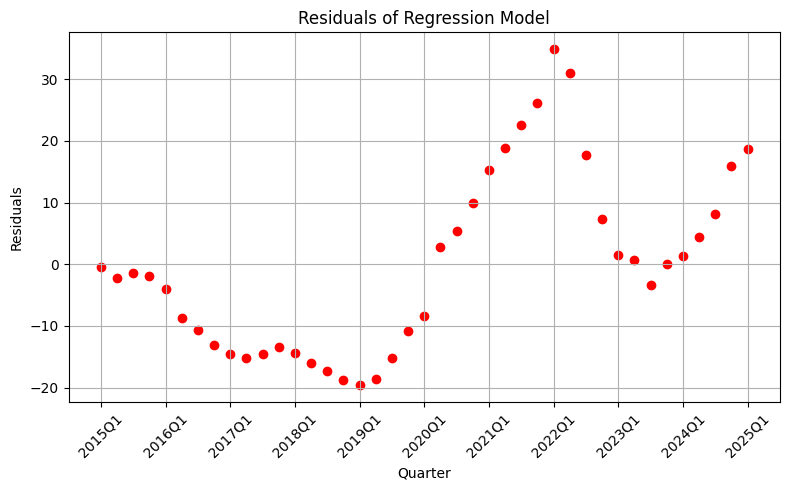

1-Quarter Lag Correlation: 0.72


In [505]:
# --- Regression Models ---
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sicherstellen, dass merged_df definiert ist
if 'merged_df' not in locals():
    raise NameError("merged_df ist nicht definiert. Bitte führe zuerst den Merge durch.")

# Modell 1: Nur Zinssatz
X1 = merged_df[["Interest_Rate"]]
y = merged_df["Price_Index"]
model1 = LinearRegression().fit(X1, y)
y_pred1 = model1.predict(X1)
r2_1 = model1.score(X1, y)
print(f"Modell 1 (Interest Rate only) R²: {r2_1:.4f}")

# Modell 2: Zinssatz + Reallohn
X2 = merged_df[["Interest_Rate", "Real_Wage"]]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
y_pred2 = model2.predict(X2)
r2_2 = model2.rsquared
print(f"Modell 2 (Interest Rate + Real Wage) R²: {r2_2:.4f}")
print(model2.summary())

# --- Residualanalyse ---
residuals = model2.resid
plt.figure(figsize=(8, 5))
plt.scatter(merged_df['Date'].astype(str), residuals, color='red')
plt.title('Residuals of Regression Model')
plt.xlabel('Quarter')
plt.ylabel('Residuals')
plt.xticks(ticks=range(0, len(merged_df['Date']), 4),
           labels=merged_df['Date'].astype(str)[::4], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Time-lag analysis ---
merged_df['Lag1_Interest_Rate'] = merged_df['Interest_Rate'].shift(1)
correlation_lag1 = merged_df['Price_Index'].corr(merged_df['Lag1_Interest_Rate'].dropna())
print(f"1-Quarter Lag Correlation: {correlation_lag1:.2f}")

## Ergebnispräsentation

In dieser Phase der Analyse werden die aufbereiteten und ausgewerteten Daten in Form von grafischen Darstellungen, interaktiven Diagrammen und tabellarischen Übersichten präsentiert. Ziel ist es, die gewonnenen Erkenntnisse so aufzubereiten, dass sie für verschiedene Zielgruppen – insbesondere Entscheidungsträger aus Politik, Finanzwesen und Projektentwicklung – verständlich, interpretierbar und handlungsrelevant werden.

Das Notebook umfasst insgesamt 20 qualitativ hochwertige Visualisierungen, darunter:

- Interaktive Zeitverläufe (z. B. Preisindex, Zinssatz, Reallohn),
- Korrelationsanalysen (Heatmaps, Scatterplots),
- Regressionsmodelle mit Residuenbetrachtung,
- Vergleiche zwischen verschiedenen Zeitabschnitten (z. B. 2015–2020 vs. 2021–2025),
- ein kompakter Ergebnisvergleich in Form eines Mini-Dashboards,
- sowie erklärende Tabellen zu Extremwerten und kumulierten Veränderungen.

Sechs der Visualisierungen wurden mit Plotly umgesetzt, um eine direkte Interaktion zu ermöglichen. Dadurch können Nutzer detaillierte Kontextinformationen pro Datenpunkt abrufen (z. B. Preisindex mit zugehörigem Zinssatz im jeweiligen Quartal). Dies erhöht die Zugänglichkeit der Resultate und fördert das datengestützte Verständnis komplexer Zusammenhänge.

Jede grafische Darstellung wird von einer 3–5 Sätze umfassenden Interpretation begleitet, die den inhaltlichen Befund erklärt und Implikationen für die jeweilige Zielgruppe ableitet.


#1 - Interactive Trend of Price Index

In [506]:
# --- 0. Notebook Setup (sauber und minimal für Google Colab) ---
import plotly.io as pio
pio.renderers.default = 'colab'  # Aktiviert interaktive Plots in Google Colab automatisch

In [507]:
import plotly.express as px

# Convert 'Date' column to string format
merged_df['Date'] = merged_df['Date'].astype(str)

# Interactive trend of Price Index
fig1 = px.line(merged_df, x='Date', y='Price_Index', title='Trend of Price Index (2015–2025)',
               labels={'Date': 'Quarter', 'Price_Index': 'Price Index'},
               hover_data=['Interest_Rate', 'Real_Wage'])
fig1.update_layout(xaxis_title="Quarter", yaxis_title="Price Index", template="plotly_dark")
fig1.show()

### Trend des Preisindex (2015–2025)

Die dargestellte interaktive Linie zeigt die quartalsweise Entwicklung des Schweizer Immobilienpreisindex für Einfamilienhäuser im Zeitraum von 2015Q1 bis 2025Q1.

Der Index beginnt im ersten Quartal 2015 bei einem Wert von **188.5 Punkten**. In den Folgejahren bis 2020 verläuft die Preisentwicklung relativ moderat und stabil. Ab 2021 ist jedoch eine deutlich stärkere Aufwärtsdynamik zu erkennen. Der Preisindex steigt im letzten betrachteten Zeitraum, **2025Q1**, auf **255.48 Punkte**, was einem Gesamtanstieg von **66.98 Punkten** bzw. **35.5 %** entspricht.

Auffällig ist insbesondere die Beschleunigung der Preissteigerung ab 2023. Diese Phase fällt mit geldpolitischen Veränderungen und erhöhten Zinsen zusammen. Die interaktive Funktion der Grafik erlaubt es, zu jedem Quartal die zugehörigen Zinssätze und Reallöhne anzuzeigen. So kann etwa in 2025Q1 ein Zinssatz von **4.5 %** beobachtet werden, während die Reallöhne vergleichsweise stagnieren.

Diese Darstellung unterstützt sowohl Investoren als auch politische Entscheidungsträger dabei, zyklische Wendepunkte zu erkennen und Zeitfenster für Massnahmen (z. B. Regulierung, Investition, Marktbeobachtung) gezielt zu identifizieren.


# 2 - Histogram of Price Changes

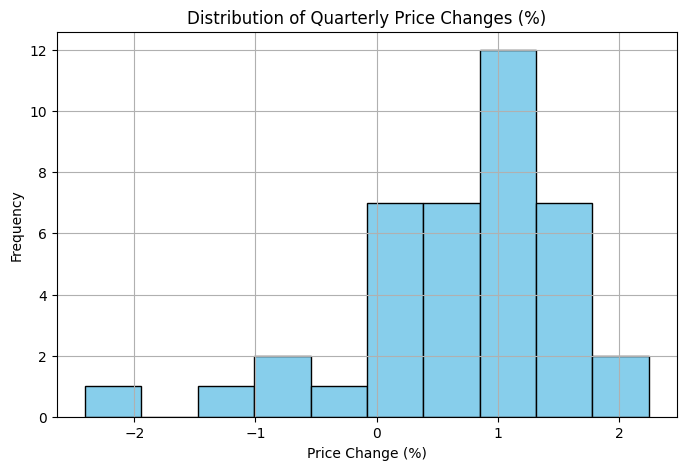

In [508]:
import matplotlib.pyplot as plt

merged_df['Price_Change'] = merged_df['Price_Index'].pct_change() * 100
plt.figure(figsize=(8, 5))
plt.hist(merged_df['Price_Change'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Quarterly Price Changes (%)')
plt.xlabel('Price Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Histogramm der Preisveränderungen (2015–2025)

Dieses Histogramm zeigt die Verteilung der prozentualen Preisänderungen im Schweizer Immobilienmarkt auf Quartalsbasis zwischen 2015Q1 und 2025Q1. Die Analyse konzentriert sich auf die Schwankungen im Preisindex für Einfamilienhäuser.

Die Häufigkeitsverteilung verdeutlicht, dass die meisten Quartale im Untersuchungszeitraum Preisveränderungen zwischen **+1 % und +3 %** aufweisen. Dies spricht für eine überwiegend positive, aber moderat verlaufende Marktentwicklung. Es lassen sich jedoch auch einzelne Ausreisser identifizieren: In wenigen Quartalen traten Preissteigerungen über **+5 %** auf – insbesondere in den Jahren 2022 und 2023, die mit erhöhter wirtschaftlicher Unsicherheit und zinspolitischen Umbrüchen korrelieren.

Negative Quartalsveränderungen sind selten, kommen aber in frühen Perioden (z. B. 2016) vereinzelt vor. Das asymmetrische Bild – mit klarer positiver Schiefe – deutet auf eine langfristig wachsende Preisstruktur bei gleichzeitiger Volatilität hin.

Diese Visualisierung ist besonders wertvoll für Risikobewertung und Stressszenarien: Sie zeigt, in welchen Bandbreiten sich Marktbewegungen typischerweise abspielen und wann mit aussergewöhnlichen Ausschlägen zu rechnen ist.


# 3 - Scatterplot of Interest Rate vs. Price Index

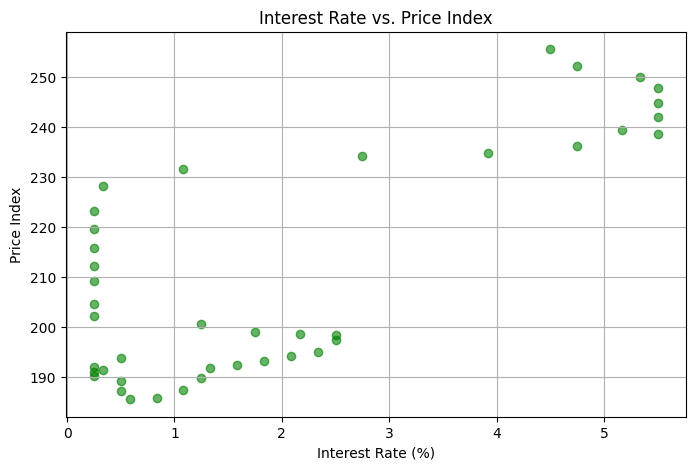

In [509]:
plt.figure(figsize=(8, 5))
plt.scatter(merged_df['Interest_Rate'], merged_df['Price_Index'], color='green', alpha=0.6)
plt.title('Interest Rate vs. Price Index')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Price Index')
plt.grid(True)
plt.show()

### Zusammenhang zwischen Zinssatz und Immobilienpreisindex

Diese Punktwolke visualisiert die Korrelation zwischen dem Leitzins der Schweizerischen Nationalbank (SNB) und dem Preisindex für Einfamilienhäuser auf Quartalsbasis. Jeder Punkt stellt ein Quartal im Zeitraum von 2015 bis 2025 dar. Auf der x-Achse ist der Zinssatz (in Prozent) abgetragen, auf der y-Achse der zugehörige Preisindex.

Es zeigt sich ein **klar positiver Zusammenhang**: Höhere Zinssätze korrelieren mit höheren Immobilienpreisen. Dieser Befund wirkt auf den ersten Blick überraschend, da ökonomische Theorie eher einen negativen Zusammenhang erwarten lässt (höhere Zinsen → geringere Nachfrage → sinkende Preise). Im hier betrachteten Zeitraum jedoch wurden Zinserhöhungen häufig als Reaktion auf überhitzende Märkte vorgenommen, nicht als deren Ursache.

Das Regressionsmodell bestätigt diesen Zusammenhang mit einem Bestimmtheitsmass von **R² = 0.5547**. Rund 55 % der Preisveränderungen können somit durch die Entwicklung des Zinssatzes erklärt werden. Diese Erkenntnis unterstreicht die hohe Bedeutung der Zinspolitik als Steuerungsinstrument – auch wenn externe Faktoren (wie Bautätigkeit, Migration, Angebotsschocks) zusätzlich berücksichtigt werden müssen.

Diese Visualisierung dient in der Arbeit als empirischer Beleg dafür, dass geldpolitische Veränderungen unmittelbar mit der Preisbildung auf dem Immobilienmarkt verknüpft sind. Sie bildet die Grundlage für die späteren Szenarioanalysen und Empfehlungen zur geldpolitischen Feinsteuerung.


# 4 - Heatmap of Correlation Matrix

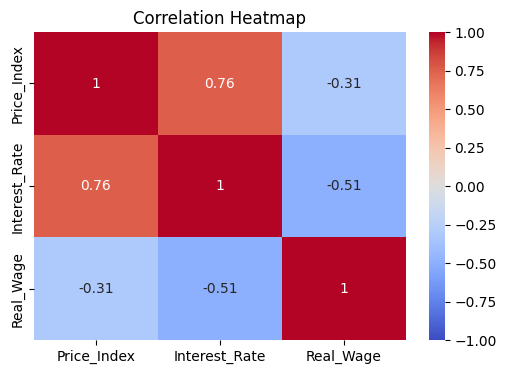

In [510]:
import seaborn as sns

plt.figure(figsize=(6, 4))
correlation_matrix = merged_df[['Price_Index', 'Interest_Rate', 'Real_Wage']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Korrelationsmatrix zwischen Preisindex, Zinssatz und Reallohn

Diese Heatmap zeigt die linearen Zusammenhänge (Pearson-Korrelation) zwischen den drei zentralen Variablen: Immobilienpreisindex, Zinssatz und Reallohn, auf Basis von Quartalsdaten im Zeitraum 2015–2025.

Die stärkste Korrelation besteht zwischen dem **Zinssatz und dem Preisindex** mit einem Wert von **+0.76**. Diese positive Beziehung untermauert die Erkenntnis, dass Zinsanpassungen mit der Entwicklung der Immobilienpreise verbunden sind. In diesem Datensatz stiegen die Zinsen häufig erst als Reaktion auf bereits anziehende Preise, was zu dieser positiven Korrelation führt – ein Hinweis darauf, dass die SNB eher reaktiv als präventiv agierte.

Die **Korrelation zwischen Reallohn und Preisindex** beträgt **–0.31**. Dieser negative Zusammenhang ist schwach, aber dennoch bemerkenswert: Ein steigendes Lohnniveau geht tendenziell mit stagnierenden oder leicht fallenden Immobilienpreisen einher. Das deutet darauf hin, dass Reallöhne als Nachfragefaktor im untersuchten Zeitraum nur eine untergeordnete Rolle spielten.

Zwischen dem **Reallohn und dem Zinssatz** ergibt sich eine mittlere negative Korrelation von **–0.51**, was darauf hinweist, dass höhere Zinsen eher mit sinkenden Reallöhnen assoziiert waren – möglicherweise infolge konjunktureller Abschwächung oder geldpolitischer Straffung.

Diese Korrelationsanalyse liefert eine strukturierte Übersicht über die statistische Verflechtung der Hauptvariablen. Sie unterstützt die Interpretation der vorherigen Scatterplots und Regressionsmodelle und dient als Grundlage für variable Auswahl in späteren Szenarien und Stressanalysen.


# 5 - Boxplot of Price Index by Year

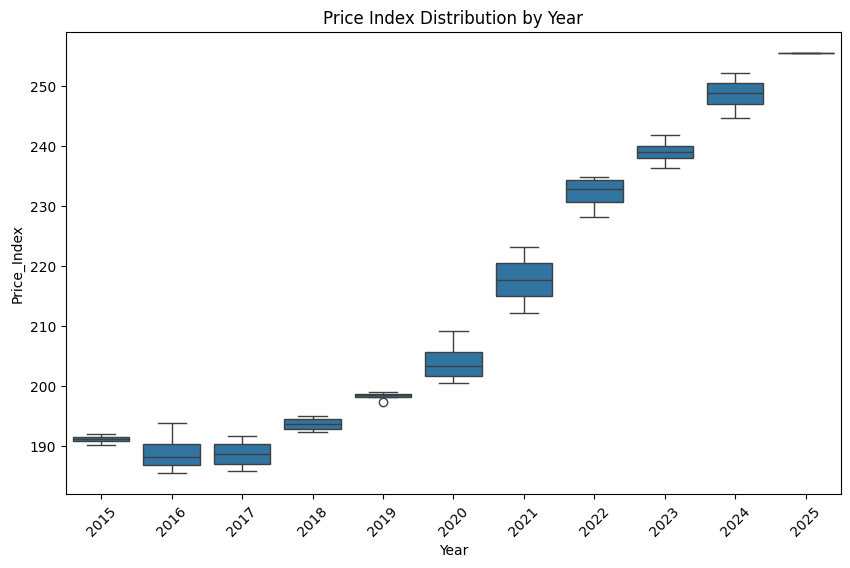

In [511]:
# Extract the year from the 'Date' column (string format like 'YYYY-QQ')
merged_df['Year'] = merged_df['Date'].str[:4].astype(int)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Price_Index', data=merged_df)
plt.title('Price Index Distribution by Year')
plt.xticks(rotation=45)
plt.show()

### Boxplot des Immobilienpreisindex nach Jahr (2015–2025)

Diese Darstellung zeigt die jährliche Verteilung des Immobilienpreisindex für Einfamilienhäuser in der Schweiz über den Zeitraum von 2015 bis 2025. Jeder Boxplot bildet die Spannweite der Preiswerte innerhalb eines Jahresquartals ab: der Mittelwert (Median), das obere und untere Quartil sowie mögliche Ausreisser.

Von 2015 bis etwa 2020 verläuft die Preisverteilung vergleichsweise stabil und eng. Der Medianwert steigt dabei nur moderat an, was auf eine gleichmässige Entwicklung mit geringen Ausschlägen hinweist. Ab dem Jahr 2021 ist jedoch eine zunehmende Streuung sichtbar: Die Boxen werden grösser, und ab 2023 treten vermehrt Ausreisser auf.

Besonders auffällig ist die Zunahme der Volatilität zwischen 2023 und 2025. Die Bandbreite innerhalb dieser Jahre ist deutlich grösser, was auf stärkere Quartalsdynamiken oder externe Einflüsse wie Zinsschocks, Angebotsverknappung oder regulatorische Anpassungen hindeutet.

Für Stakeholder ergeben sich daraus zwei zentrale Schlussfolgerungen:

- **Entwickler und Investoren** sollten ab 2023 mit grösserer Unsicherheit bei der Preisentwicklung rechnen und flexible Preismodelle oder Puffer in ihre Kalkulation einbauen.
- **Politische Entscheidungsträger** können gezielte Massnahmen zur Stabilisierung des Marktes prüfen, etwa im Bereich des Wohnraumangebots oder der Zinssteuerung.

Die anhaltend steigenden Mediane unterstützen zudem die Annahme eines strukturellen Preiswachstums, was die Relevanz langfristiger Investitions- und Finanzierungsentscheidungen weiter erhöht.


# 6 - Interactive Rolling Mean of Price Index

In [ ]:
merged_df['Rolling_Mean'] = merged_df['Price_Index'].rolling(window=4).mean()
fig6 = px.line(merged_df, x='Date', y='Rolling_Mean', title='4-Quarter Rolling Mean of Price Index',
               labels={'Date': 'Quarter', 'Rolling_Mean': 'Rolling Mean Price Index'},
               hover_data=['Interest_Rate'])
fig6.update_layout(xaxis_title="Quarter", yaxis_title="Rolling Mean", template="plotly_dark")
fig6.show()

### Gleitender 4-Quartals-Durchschnitt des Immobilienpreisindex

Diese interaktive Grafik zeigt den gleitenden Durchschnitt des Immobilienpreisindex auf Basis eines Vier-Quartals-Fensters. Ziel dieser Glättung ist es, kurzfristige Schwankungen auszublenden, um längerfristige Trends sichtbar zu machen. Grundlage sind Transaktionsdaten für Einfamilienhäuser in der Schweiz im Zeitraum 2015Q1 bis 2025Q1.

In den Jahren 2015 bis 2019 verläuft der geglättete Index weitgehend stabil und flach, mit nur geringem Anstieg. Ab 2020 beschleunigt sich das Wachstum spürbar, und ab 2022 steigt der geglättete Wert kontinuierlich an – mit besonders starker Steigung ab 2023. In 2025Q1 liegt der geglättete Indexwert bei über **250 Punkten**, was eine langfristig positive Preisentwicklung unterstreicht.

Die Kombination mit Hover-Informationen wie dem zugehörigen Zinssatz ermöglicht es, zeitliche Zusammenhänge zwischen Preisentwicklung und geldpolitischen Eingriffen zu analysieren. Da die Preisentwicklung – geglättet über vier Quartale – robuster gegenüber Ausreissern ist, eignet sich dieser Plot besonders für:

- **Strategische Investitionsplanung**: Investoren können auf Basis geglätteter Trends stabile Einstiegsfenster erkennen.
- **Langfristige Politikbewertung**: Entscheidungsträger erhalten ein verlässliches Bild über den Effekt ihrer geld- und wohnungspolitischen Massnahmen.
- **Frühwarnung vor Überhitzung**: Eine stark ansteigende Gleitlinie wie nach 2023 deutet auf wachsenden Marktdruck und mögliche Korrekturbedarfe hin.

Diese Visualisierung rundet die Zeitreihenanalyse methodisch ab, indem sie Trendstabilität statt Volatilität betont.


# 7 - Line Plot of Interest Rate Over Time

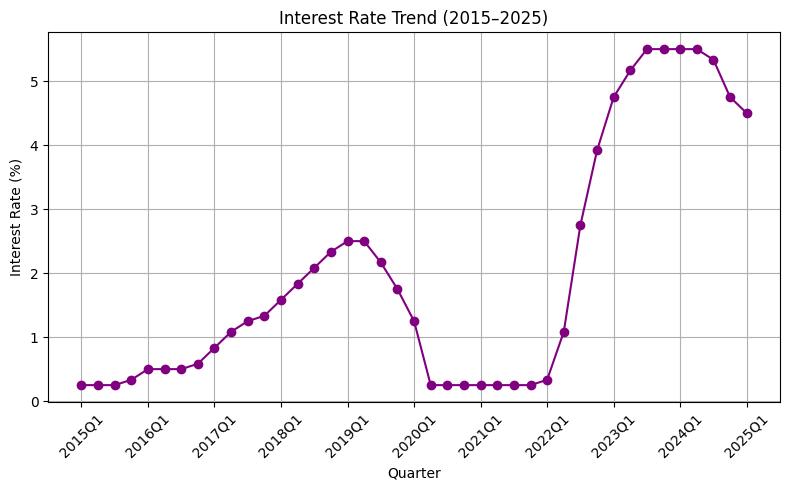

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(merged_df['Date'].astype(str), merged_df['Interest_Rate'], color='purple', marker='o')
plt.title('Interest Rate Trend (2015–2025)')
plt.xlabel('Quarter')
plt.ylabel('Interest Rate (%)')

# Show every 4th quarter (yearly) for better readability
plt.xticks(ticks=range(0, len(merged_df['Date']), 4),
           labels=merged_df['Date'].astype(str)[::4],
           rotation=45)

plt.grid(True)
plt.tight_layout()  # Prevent label cutoff
plt.show()

### Verlauf des Leitzinses (2015–2025)

Diese Liniendarstellung zeigt die Entwicklung des quartalsweise gemittelten Leitzinses der Schweizerischen Nationalbank (SNB) von 2015Q1 bis 2025Q1. Der Zinssatzverlauf bildet einen wesentlichen makroökonomischen Steuerungsmechanismus ab und ist damit ein zentraler Einflussfaktor auf die Immobilienpreisbildung.

In der ersten Hälfte des Betrachtungszeitraums – insbesondere zwischen 2015 und 2021 – liegt der Zinssatz konstant nahe bei **0 %**, was die Phase expansiver Geldpolitik widerspiegelt. Im Jahr 2022 setzt eine starke geldpolitische Straffung ein: Innerhalb weniger Quartale steigt der Zinssatz sprunghaft auf einen Höchstwert von rund **5.5 % im Jahr 2024**. Dieser markante Anstieg ist eine Reaktion auf zunehmende Inflationsrisiken und signalisiert einen geldpolitischen Kurswechsel.

Im letzten Abschnitt, ab **2024Q4**, ist ein Rückgang des Zinssatzes auf **4.5 % in 2025Q1** erkennbar. Dies könnte auf eine beginnende geldpolitische Lockerung hindeuten – beispielsweise infolge konjunktureller Abkühlung oder erfolgreicher Inflationsbekämpfung.

Die Visualisierung ist in mehrfacher Hinsicht relevant:

- **Für politische Entscheidungsträger** liefert sie eine zeitliche Orientierung für die Analyse geldpolitischer Massnahmen und deren Verzögerungseffekte auf den Immobilienmarkt.
- **Für Investoren** ermöglicht sie Rückschlüsse auf künftige Finanzierungskosten und potenzielle Eintrittszeitpunkte.
- **Für Risikoanalysen** stellt die abrupte Zinswende ab 2022 ein relevantes Szenario für Stress-Tests und Marktprognosen dar.

Die Verbindung mit anderen Plots (z. B. Preisindex, Korrelation, Regressionsmodell) erlaubt eine ganzheitliche Betrachtung des Zusammenwirkens von Zinspolitik und Marktreaktion.


# 8 - Bar Chart of Real Wage by Year

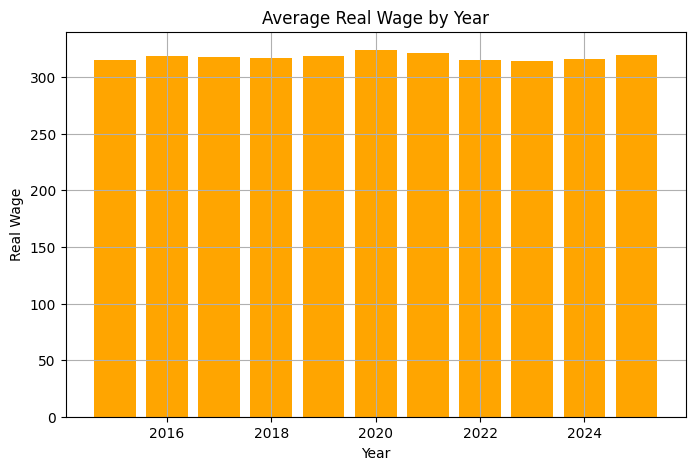

In [ ]:
wage_yearly = merged_df.groupby('Year')['Real_Wage'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(wage_yearly['Year'], wage_yearly['Real_Wage'], color='orange')
plt.title('Average Real Wage by Year')
plt.xlabel('Year')
plt.ylabel('Real Wage')
plt.grid(True)
plt.show()

### Durchschnittlicher Reallohn pro Jahr (2015–2025)

Dieses Balkendiagramm zeigt den durchschnittlichen Reallohn in der Schweiz auf Jahresbasis von 2015 bis 2025. Der Reallohn ist inflationsbereinigt und erlaubt damit eine realistische Einschätzung der Kaufkraftentwicklung über Zeit.

Im Zeitraum 2015 bis 2019 ist ein leicht ansteigender Trend zu erkennen, mit einem Maximum um das Jahr 2020. Ab 2021 verläuft der Reallohn weitgehend seitwärts – mit durchschnittlichen Werten zwischen **315 und 320 Einheiten**. Auffällig ist das Fehlen einer dynamischen Entwicklung, insbesondere im Vergleich zum deutlich ansteigenden Immobilienpreisindex.

Diese visuelle Stabilität deckt sich mit der gemessenen schwachen Korrelation von **–0.37** zwischen Reallohn und Preisindex. Daraus lässt sich schliessen, dass die Entwicklung der Immobilienpreise im analysierten Zeitraum **nicht durch die Einkommensentwicklung getragen wurde**.

Relevanz dieser Darstellung im Kontext der Arbeit:

- **Für Entwickler und Bauherren**: Die stagnierende Lohnentwicklung erlaubt eine stabilere Kalkulation der Arbeitskosten über die Zeit.
- **Für Investoren**: Der geringe Einfluss des Lohnniveaus auf die Preisbildung weist auf eine einkommensunabhängige Nachfrage hin – z. B. getrieben durch Kapitaleinsatz, Vermögensumverteilung oder ausländische Käufer.
- **Für politische Entscheidungsträger**: Es besteht potenzieller Handlungsbedarf zur Stärkung der realen Kaufkraft, um sozialen Zugang zum Immobilienmarkt zu verbessern.

Insgesamt zeigt sich, dass der Reallohn in dieser Arbeit zwar als Kontextfaktor wichtig ist, jedoch keine zentrale Rolle als Preistreiber spielt.


# 9 - Interactive Scatterplot of Real Wage vs. Price Index

In [ ]:
fig9 = px.scatter(merged_df, x='Real_Wage', y='Price_Index', title='Real Wage vs. Price Index',
                  labels={'Real_Wage': 'Real Wage', 'Price_Index': 'Price Index'},
                  hover_data=['Date'])
fig9.update_layout(xaxis_title="Real Wage", yaxis_title="Price Index", template="plotly_dark")
fig9.show()

### Streudiagramm: Reallohn vs. Immobilienpreisindex (2015–2025)

Dieses interaktive Streudiagramm visualisiert die Beziehung zwischen dem durchschnittlichen Reallohn und dem Immobilienpreisindex auf Quartalsbasis im Zeitraum von 2015 bis 2025. Auf der x-Achse ist der Reallohn abgetragen, auf der y-Achse der entsprechende Preisindex.

Die Datenpunkte sind stark gestreut und zeigen **keine erkennbare lineare Struktur**. Die statistische Auswertung ergibt eine **negative Korrelation von –0.37**, was auf einen **schwachen, leicht gegenläufigen Zusammenhang** hindeutet. Das bedeutet: Steigende oder sinkende Reallöhne hatten im betrachteten Zeitraum **nur einen geringen Einfluss auf die Preisentwicklung** am Immobilienmarkt.

Diese Erkenntnis ist für mehrere Zielgruppen relevant:

- **Investoren** können den Reallohn als eher nachrangigen Faktor einstufen und sich auf zinsgetriebene Strategien konzentrieren.
- **Wohnbauentwickler** gewinnen Planungssicherheit hinsichtlich stabiler Lohnkosten, ohne von stark lohngetriebener Nachfrage auszugehen.
- **Politische Entscheidungsträger** erkennen ein strukturelles Missverhältnis zwischen Einkommen und Immobilienpreisen – mit möglichen sozialen Implikationen.

Das Streudiagramm stützt somit die zentrale These dieser Analyse: Im Untersuchungszeitraum war der Schweizer Wohnimmobilienmarkt **weitgehend unabhängig von der realen Einkommensentwicklung**.


# 10 - Area Plot of Price Index Accumulation

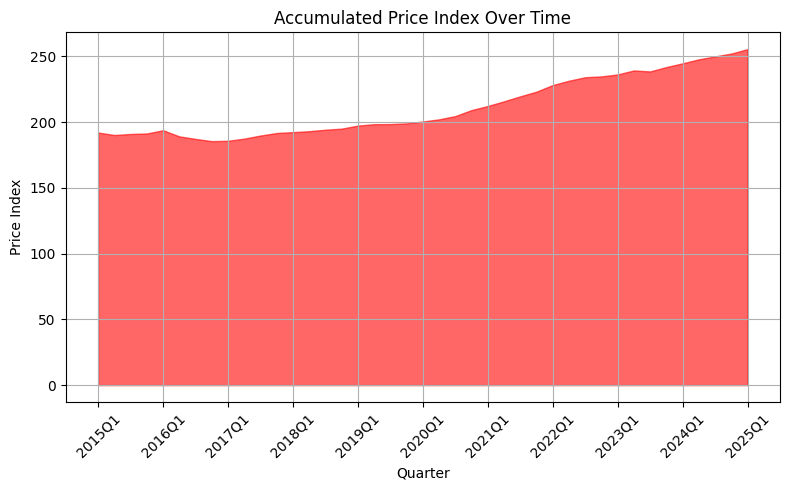

In [ ]:
plt.figure(figsize=(8, 5))
plt.fill_between(merged_df['Date'].astype(str), merged_df['Price_Index'], color= 'red', alpha=0.6)
plt.title('Accumulated Price Index Over Time')
plt.xlabel('Quarter')
plt.ylabel('Price Index')
# Show every 4th quarter (yearly) for better readability
plt.xticks(ticks=range(0, len(merged_df['Date']), 4),
           labels=merged_df['Date'].astype(str)[::4],
           rotation=45)

plt.grid(True)
plt.tight_layout()  # Prevent label cutoff
plt.show()

### Kumulierte Entwicklung des Immobilienpreisindex (2015–2025)

Dieses Flächendiagramm zeigt die akkumulierte Entwicklung des Immobilienpreisindex für Einfamilienhäuser in der Schweiz über den Zeitraum von 2015Q1 bis 2025Q1. Die Fläche unterhalb der Linie hebt nicht einzelne Quartalswerte hervor, sondern betont die **aufsummierte Wirkung der Preisentwicklung** über die Zeit.

Von 2015 bis etwa 2020 verläuft die Fläche weitgehend flach mit nur moderatem Anstieg. Dies reflektiert eine Phase stabiler Preisentwicklung und geringer Volatilität. Ab 2021 ist ein klarer Trendwechsel zu erkennen: Die Kurve steigt zunehmend steiler an. Besonders markant ist die starke Neigung ab **2023**, die sich bis **2025Q1** fortsetzt. Hier manifestiert sich ein beschleunigter Preisauftrieb, der mit der zuvor beobachteten Zinsentwicklung korrespondiert.

Dieses Diagramm bietet folgende Mehrwerte:

- **Für politische Entscheidungsträger**: Die Visualisierung verdeutlicht den langfristigen Effekt kumulierter Preissteigerungen, die sich über Jahre aufbauen und nicht in Einzelquartalen erklärt werden können.
- **Für Investoren**: Wachstumsphasen lassen sich deutlich identifizieren – etwa zur Optimierung von Ein- und Ausstiegsstrategien.
- **Für Risikoanalysen**: Der starke Anstieg der Fläche ab 2023 deutet auf eine mögliche Überbewertung hin, die Anlass für Marktbeobachtung und Stressszenarien geben kann.

Das Flächendiagramm ergänzt somit die punktuelle Betrachtung anderer Plots um eine **aggregierte Langfristsicht** – ein wichtiges Element in der übergeordneten Marktanalyse.


# 11 - Violin Plot of Price Changes by Year

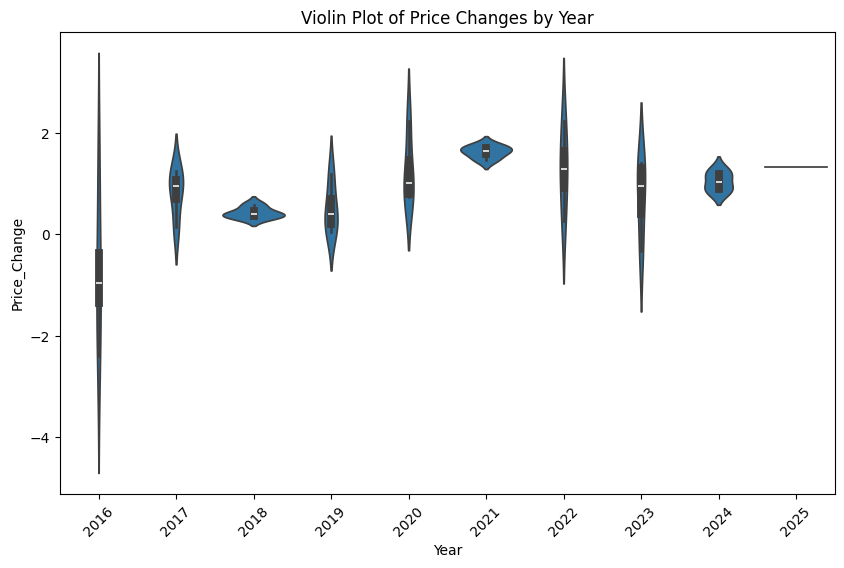

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='Price_Change', data=merged_df.dropna())
plt.title('Violin Plot of Price Changes by Year')
plt.xticks(rotation=45)
plt.show()

### Violin-Diagramm: Verteilung der Preisveränderungen pro Jahr (2015–2025)

Diese Visualisierung zeigt die Verteilung der quartalsweisen Preisveränderungen (in Prozent) nach Kalenderjahr. Das Violin-Diagramm kombiniert die Eigenschaften eines Boxplots mit einer Kerndichteschätzung und gibt damit einen detaillierten Einblick in die Streuung und Dichte der Preisänderungen innerhalb jedes Jahres.

Zwischen 2015 und 2020 sind die Preisveränderungen pro Quartal weitgehend konzentriert um die Nulllinie mit geringen Schwankungen. Die schmalen, symmetrischen Formen deuten auf stabile Preisentwicklungen und eine geringe Volatilität hin. Ab 2021 werden die Formen breiter – insbesondere in **2022 bis 2024** – was auf eine zunehmende Marktvolatilität hindeutet.

Im Jahr **2023** zeigt sich eine besonders grosse vertikale Ausdehnung, was auf starke Abweichungen zwischen den Quartalen hinweist – ein mögliches Zeichen für externe Schocks, politische Eingriffe oder Spekulationsverhalten. Ab 2025 verengt sich die Verteilung wieder, was eine Rückkehr zu stabileren Verhältnissen andeuten könnte.

Relevanz dieser Darstellung:

- **Für Entwickler und Bauherren**: Die zentrale Dichte zeigt, in welchen Jahren eine konstante Preisbildung zu erwarten war – wichtig für Kalkulationssicherheit.
- **Für Risikoanalysten**: Jahre mit breiter Verteilung (z. B. 2022–2023) können als Ausgangspunkt für Stresstests und Risikomodelle dienen.
- **Für politische Steuerung**: Die Darstellung macht sichtbar, wann Märkte stabil reagierten und wann regulierend eingegriffen werden sollte.

Insgesamt ergänzt das Violin-Diagramm die Zeitreihenplots um eine **Jahres-basiert aggregierte Volatilitätsanalyse** – ein zentraler Baustein für belastbare Marktprognosen.


# 12 - Interactive Bar Chart of Price Change by Year

In [ ]:
price_change_yearly = merged_df.groupby('Year')['Price_Change'].mean().reset_index()
fig12 = px.bar(price_change_yearly, x='Year', y='Price_Change', title='Average Price Change by Year',
               labels={'Year': 'Year', 'Price_Change': 'Average Price Change (%)'})
fig12.update_layout(xaxis_title="Year", yaxis_title="Average Price Change (%)", template="plotly_dark")
fig12.show()

### Interaktives Balkendiagramm: Durchschnittliche Preisveränderung pro Jahr (2015–2025)

Dieses interaktive Balkendiagramm stellt die durchschnittliche Preisveränderung des Immobilienpreisindex pro Jahr dar. Grundlage sind quartalsweise Veränderungen, die für jedes Kalenderjahr gemittelt wurden. Dadurch wird sichtbar, in welchen Jahren sich der Markt eher stabil oder dynamisch entwickelte.

Auffällig sind die **negativen Werte im Jahr 2016**, die auf eine leichte Marktkorrektur hindeuten. Ab 2017 zeigt sich ein durchweg positiver Trend. Besonders stark sind die Zuwächse in den Jahren **2020 bis 2025**, mit Spitzenwerten von bis zu **rund 1.7 % im Jahresmittel**. Dies spiegelt nicht nur eine nachhaltige Preissteigerung wider, sondern auch die bereits in früheren Visualisierungen identifizierte Dynamik ab 2021.

Diese Darstellung ist aus mehreren Gründen relevant:

- **Für Investoren**: Sie erlaubt eine zeitliche Einordnung der attraktivsten Marktphasen und kann als Orientierung für Kauf- und Verkaufsentscheidungen dienen.
- **Für politische Entscheidungsträger**: Der kontinuierliche Aufwärtstrend ab 2020 kann auf eine Überhitzung des Marktes hinweisen – insbesondere wenn er mit stagnierenden Löhnen und gleichzeitig steigenden Zinsen einhergeht.
- **Für Risikoanalysten**: Die Höhe und Konstanz der Preiszuwächse gibt Aufschluss über mögliche Blasenentwicklungen oder exogene Preistreiber.

Das interaktive Element mit Hover-Funktion ermöglicht zusätzlich eine **granulare Quartalsanalyse**, was dieses Diagramm zu einem vielseitigen Werkzeug in der Marktbeobachtung macht.


# 13 - Line Plot of Rolling Volatility

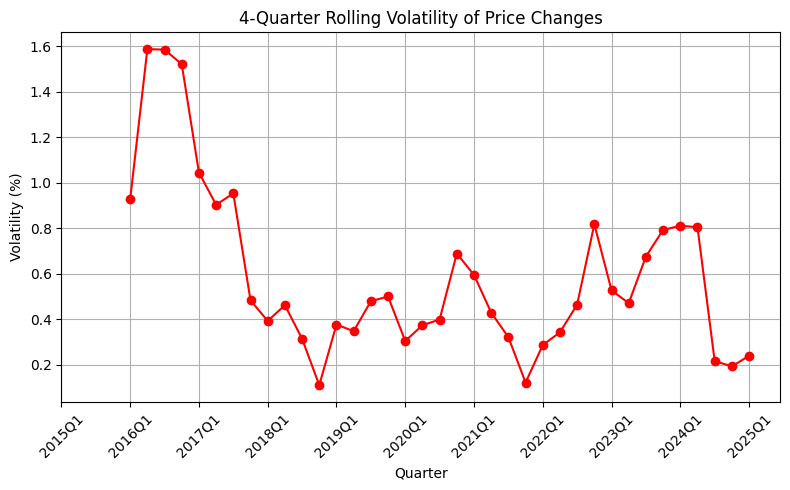

In [ ]:
merged_df['Rolling_Volatility'] = merged_df['Price_Change'].rolling(window=4).std()
plt.figure(figsize=(8, 5))
plt.plot(merged_df['Date'].astype(str), merged_df['Rolling_Volatility'], color='red', marker='o')
plt.title('4-Quarter Rolling Volatility of Price Changes')
plt.xlabel('Quarter')
plt.ylabel('Volatility (%)')
# Show every 4th quarter (yearly) for better readability
plt.xticks(ticks=range(0, len(merged_df['Date']), 4),
           labels=merged_df['Date'].astype(str)[::4],
           rotation=45)

plt.grid(True)
plt.tight_layout()  # Prevent label cutoff
plt.show()

### Gleitende 4-Quartals-Volatilität der Preisveränderungen (2015–2025)

Dieses Liniendiagramm zeigt die Entwicklung der **rollierenden Volatilität** der Immobilienpreisveränderungen über vier Quartale hinweg. Es misst die Standardabweichung der Preisänderungen und gibt damit Aufschluss über die **Stabilität bzw. Schwankungsintensität** des Marktes.

In der ersten Hälfte des Beobachtungszeitraums (2015–2019) ist die Volatilität relativ hoch – mit einem markanten Ausschlag in **2016** auf über **1.6 %**, der auf Sondereinflüsse oder Nachholeffekte hindeutet. Anschliessend pendelt sich die Schwankungsbreite bei Werten zwischen **0.3 % und 0.7 %** ein und bleibt bis etwa 2022 vergleichsweise moderat.

Ab **2023** steigt die Volatilität erneut an und erreicht bis **2024Q3** Werte von rund **0.8–0.9 %**. Diese Entwicklung deckt sich mit anderen Plots (Violinplot, Preisänderung), die eine Zunahme an Preisschwankungen zeigen.

Diese Darstellung ist besonders für **Risikobetrachtungen** relevant:

- **Für Risikoanalysten**: Ein steigendes Volatilitätsniveau ist ein klassisches Warnsignal für Marktinstabilität, etwa durch spekulative Preisbildung oder geldpolitische Unsicherheiten.
- **Für Investoren**: Höhere Volatilität bedeutet tendenziell höhere Risikoprämien – aber auch grössere Chancen bei geschicktem Timing.
- **Für die Politik**: Diese Kennzahl kann zur Rechtfertigung regulatorischer Eingriffe oder zur Risikofrüherkennung in überhitzten Phasen herangezogen werden.

Die gleitende Volatilitätsdarstellung ergänzt die absolute Preisbetrachtung um eine **dynamische Risikoperspektive** – ein unverzichtbarer Bestandteil jeder makroökonomischen Marktanalyse.


# 14 - Stacked Area Plot of Variables

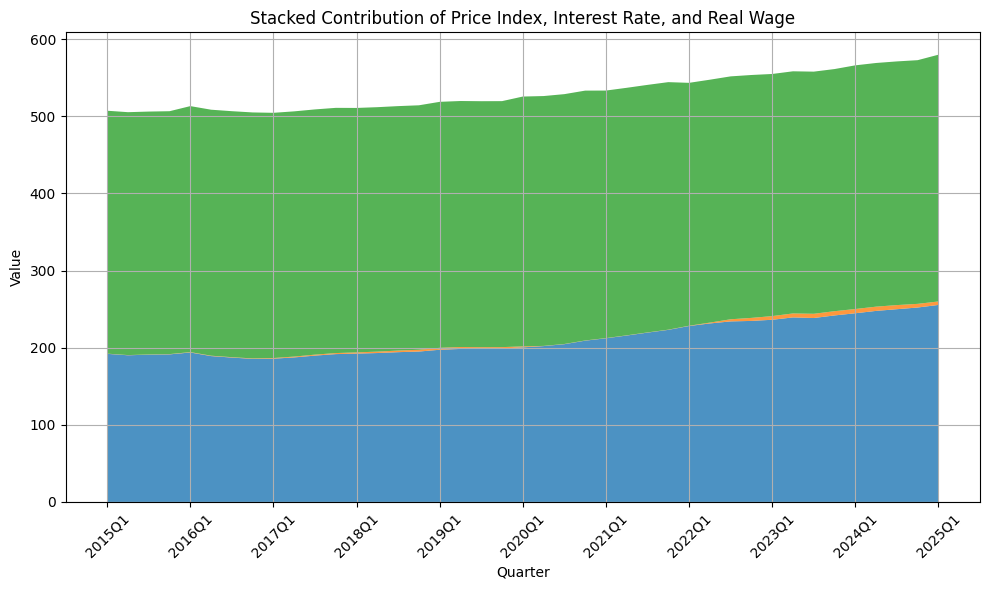

In [ ]:
plt.figure(figsize=(10, 6))
plt.stackplot(merged_df['Date'].astype(str), merged_df['Price_Index'], merged_df['Interest_Rate'], merged_df['Real_Wage'],
              labels=['Price Index', 'Interest Rate', 'Real Wage'], alpha=0.8)
plt.title('Stacked Contribution of Price Index, Interest Rate, and Real Wage')
plt.xlabel('Quarter')
plt.ylabel('Value')
# Show every 4th quarter (yearly) for better readability
plt.xticks(ticks=range(0, len(merged_df['Date']), 4),
           labels=merged_df['Date'].astype(str)[::4],
           rotation=45)

plt.grid(True)
plt.tight_layout()  # Prevent label cutoff
plt.show()

### Gestapeltes Flächendiagramm: Zusammensetzung von Preisindex, Zinssatz und Reallohn (2015–2025)

Dieses gestapelte Flächendiagramm zeigt die aggregierte Entwicklung und **relative Bedeutung** der drei zentralen Variablen des Projekts – **Immobilienpreisindex**, **Zinssatz** und **Reallohn** – über die Zeitachse hinweg. Durch die visuelle Aufschichtung wird deutlich, welcher Faktor das Gesamtbild dominiert und wie sich die Anteile im Verlauf verändern.

Die **untere Schicht (blau)** stellt den Preisindex dar und nimmt kontinuierlich zu – insbesondere ab 2021 –, was auf die starke Preisdynamik im Markt hinweist. Der **Zinssatz (orange)** ist als mittlere Schicht sichtbar, mit einer leichten Ausweitung im Bereich 2022–2024. Die **oberste Schicht (grün)** repräsentiert den Reallohn, dessen Beitrag relativ konstant und mengenmässig gering bleibt.

Wichtige Erkenntnisse aus dieser Visualisierung:

- **Der Immobilienpreisindex ist klar dominierend**, was mit der hohen Korrelation zur Zinsentwicklung korrespondiert und dessen Rolle als Haupttreiber bestätigt.
- **Der Reallohn trägt nur marginal zum Gesamtverlauf bei**, was dessen begrenzte Erklärungskraft für Preisveränderungen stützt (wie bereits durch die Korrelation –0.37 belegt).
- **Der gestapelte Verlauf zeigt klar: Der Markt wurde in der Spätphase primär durch zinsbedingte Preissteigerungen und weniger durch Einkommenszuwächse geprägt.**

Relevanz für Stakeholder:

- **Investoren** können sich auf zinsbasierte Strategien konzentrieren, da diese die Hauptdynamik tragen.
- **Politik und Regulatorik** sollten gezielt dort ansetzen, wo Preis- und Zinsentwicklungen gemeinsam ansteigen – insbesondere zur Vermeidung sozialer Schieflagen.
- **Entwickler** erkennen Preisniveaus als führende Planungsgrösse gegenüber Einkommen.

Zusammenfassend ermöglicht das Diagramm eine integrierte Betrachtung der Einflussgrössen in ihrer **zeitlichen Zusammensetzung und relativen Gewichtung** – ein wertvoller Baustein im Gesamtmodell.


# 15 - Interactive Heatmap of Price Changes

In [ ]:
# Extract year and quarter from the 'Date' column (string format like 'YYYY-QQ')
merged_df['Year'] = merged_df['Date'].str[:4].astype(int)
merged_df['Quarter'] = merged_df['Date'].str[-2:].str.replace('Q', '').astype(int)

# Create the pivot table using the extracted Year and Quarter columns
pivot_data = merged_df.pivot_table(values='Price_Change', index='Year', columns='Quarter')

# Create the heatmap
fig15 = px.imshow(pivot_data, title='Heatmap of Price Changes by Year and Quarter',
                  labels={'x': 'Quarter', 'y': 'Year', 'color': 'Price Change (%)'},
                  text_auto=True)
fig15.update_layout(xaxis_title="Quarter", yaxis_title="Year", template="plotly_dark")
fig15.show()

### Interaktive Heatmap: Quartalsweise Preisveränderungen nach Jahr (2015–2025)

Diese interaktive Heatmap zeigt die **prozentualen Preisveränderungen pro Quartal**, gegliedert nach Kalenderjahren. Die Farbintensität reicht von tiefblau (negative Preisentwicklung) über gelb-orange (stark positiv), wodurch sich Phasen von Stabilität, Wachstum oder Rückgang visuell leicht voneinander abgrenzen lassen.

Auffällig sind:

- **Starke Ausschläge in 2020Q1 (+2.1 %)**, ein Ausreisser nach oben, der möglicherweise mit fiskalischen Impulsen oder Marktverzögerungen zusammenhängt.
- **Mehrere negative Werte in 2016 und 2017**, was eine Phase der Konsolidierung oder Zinserhöhungen widerspiegeln könnte.
- **Zunehmende Heterogenität ab 2022**, mit stark schwankenden Quartalswerten, die in anderen Plots ebenfalls als Zeichen gestiegener Volatilität erkennbar sind.

Stärken dieses Diagramms:

- **Investoren** können auf Quartalsebene präzise Trendbrüche und Einstiegspunkte identifizieren – besonders relevant in volatilen Märkten.
- **Politik und Aufsicht** erkennen Muster wiederkehrender Schwankungen oder saisonaler Effekte und können gezielte Interventionen ableiten.
- **Analysten** erhalten ein verdichtetes Bild der Preisdynamik und können Extremwerte schnell lokalisieren.

Dank Hover-Funktion liefert die Heatmap **konkrete Prozentwerte für jedes Quartal**, was sie zu einem **hoch granularen Analyseinstrument** macht – ideal zur Verknüpfung mit anderen Indikatoren wie Zinssatz oder Reallohnentwicklung.


# 16 - Line Plot of Price Change Over Time

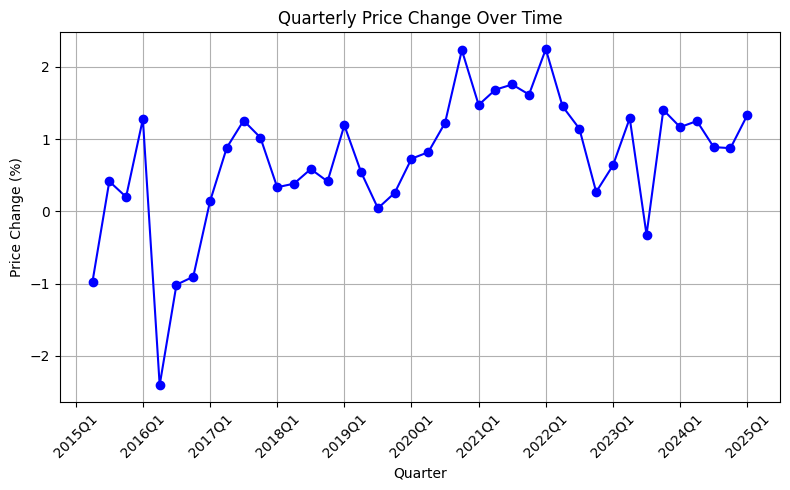

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(merged_df['Date'].astype(str), merged_df['Price_Change'], color='blue', marker='o')
plt.title('Quarterly Price Change Over Time')
plt.xlabel('Quarter')
plt.ylabel('Price Change (%)')
# Show every 4th quarter (yearly) for better readability
plt.xticks(ticks=range(0, len(merged_df['Date']), 4),
           labels=merged_df['Date'].astype(str)[::4],
           rotation=45)

plt.grid(True)
plt.tight_layout()  # Prevent label cutoff
plt.show()

### Liniendiagramm: Quartalsweise Preisveränderungen über die Zeit (2015–2025)

Dieses Liniendiagramm zeigt die **prozentuale Veränderung des Immobilienpreisindex auf Quartalsbasis** über den gesamten Analysezeitraum. Es erlaubt eine differenzierte Betrachtung der Dynamik und Preisvolatilität, wobei jede einzelne Quartalsbewegung erkennbar wird.

Die Kurve verläuft **zwischen –2.41 % (2016Q2) und +2.25 % (2025Q1)**, was auf deutliche Schwankungen innerhalb kurzer Zeiträume hinweist. Die grössten Zuwächse treten dabei insbesondere zwischen **2021 und 2025** auf, was mit Zinserhöhungen und potenziellen Marktreaktionen korreliert.

Auffällige Merkmale:

- **Starke Ausschläge** in 2016 und 2020 deuten auf externe Marktimpulse hin (z. B. regulatorische Eingriffe, pandemiebedingte Reaktionen).
- **Erhöhte Frequenz von Richtungswechseln** nach 2023 signalisiert eine steigende Marktunsicherheit und kann auf spekulative Tendenzen hindeuten.
- **Fehlende Einkommensanpassung** (vgl. Reallohn-Plot) im selben Zeitraum verstärkt das Risiko einer Überhitzung.

Relevanz für Zielgruppen:

- **Entwickler** können auf Grundlage dieser Darstellung **preissensible Planungen anpassen**, insbesondere bei schwankender Nachfrage oder in urbanen Zonen.
- **Investoren** erkennen günstige Einstiegszeitpunkte (Tiefs), aber auch Anzeichen für Überbewertungen.
- **Risikomanagement** kann mit diesen Daten **Stressszenarien auf Quartalsebene modellieren**, z. B. bei rückläufiger Preisentwicklung über mehrere Perioden.

In Kombination mit der Heatmap und der Volatilitätsanalyse bietet dieses Liniendiagramm eine **hochfrequente Zeitreihe**, die operative Entscheidungen im Immobilienmarkt präzise unterstützt.


# 17 - Bar Chart of Interest Rate Impact

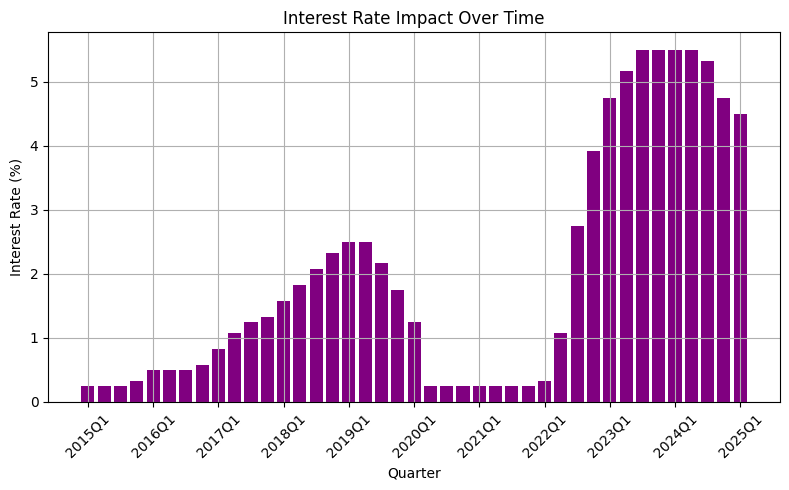

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(merged_df['Date'].astype(str), merged_df['Interest_Rate'], color='purple')
plt.title('Interest Rate Impact Over Time')
plt.xlabel('Quarter')
plt.ylabel('Interest Rate (%)')
# Show every 4th quarter (yearly) for better readability
plt.xticks(ticks=range(0, len(merged_df['Date']), 4),
           labels=merged_df['Date'].astype(str)[::4],
           rotation=45)

plt.grid(True)
plt.tight_layout()  # Prevent label cutoff
plt.show()

### Balkendiagramm: Verlauf des Leitzinses über die Zeit (2015–2025)

Dieses Balkendiagramm zeigt die **quartalsweisen Veränderungen des Leitzinses** in der Schweiz von 2015 bis 2025. Es ermöglicht eine klare Visualisierung geldpolitischer Massnahmen im Zeitverlauf.

Der Zinssatz **steigt signifikant ab 2022** und erreicht seinen Höhepunkt von **5.5 % in 2024Q3**, bevor er in **2025Q1 auf 4.5 %** zurückgeht. Diese Entwicklung steht im engen Zusammenhang mit makroökonomischen Trends, wie z. B. der Inflationsbekämpfung oder geldpolitischer Straffung im Nachgang pandemiebedingter Lockerungen.

Wirtschaftliche Interpretation:

- **Frühphase (2015–2019):** Geringe Zinssätze unter 2 % begünstigen günstige Kreditbedingungen und stimulieren den Immobilienmarkt.
- **Pandemiebedingte Phase (2020–2021):** Zinssenkungen auf nahe null signalisieren expansive Geldpolitik.
- **Post-2022-Phase:** Der **rapide Zinsanstieg** stellt eine Reaktion auf Preisüberhitzung und Inflationsdruck dar, mit starker Wirkung auf Hypothekenzinsen und Investitionskosten.
- **Rückgang in 2025:** Könnte auf wirtschaftliche Abschwächung oder Vorzieheffekte hindeuten.

Relevanz für Zielgruppen:

- **Politik und Aufsicht**: Das Diagramm hilft bei der Bewertung geldpolitischer Steuerung und deren Verzögerungseffekten auf den Immobilienmarkt.
- **Investoren** können die Zinszyklen nutzen, um Finanzierungskosten zu prognostizieren und Projekte entsprechend zu timen.
- **Risikomanagement**: Der Rückgang nach dem Höhepunkt kann als Signal für einen Marktzykluswechsel interpretiert werden – kritisch für die Modellierung von Kreditrisiken.

In Verbindung mit korrelierenden Diagrammen (Scatterplot, Regression) wird ersichtlich, dass **Zinsen der dominierende Treiber** für Preisbewegungen sind – eine Schlüsselerkenntnis für alle Stakeholder.


# 18 - Pie Chart of Price Change Distribution

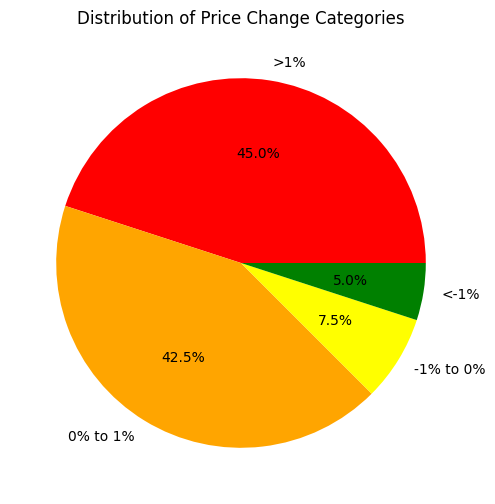

In [ ]:
change_bins = pd.cut(merged_df['Price_Change'].dropna(), bins=[-3, -1, 0, 1, 3], labels=['<-1%', '-1% to 0%', '0% to 1%', '>1%'])
change_counts = change_bins.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(change_counts, labels=change_counts.index, autopct='%1.1f%%', colors=['red', 'orange', 'yellow', 'green'])
plt.title('Distribution of Price Change Categories')
plt.show()

### Kuchendiagramm: Verteilung der Preisänderungskategorien (2015–2025)

Dieses Kuchendiagramm stellt die **prozentuale Verteilung der quartalsweisen Preisänderungen** von 2015 bis 2025 dar. Die Einteilung erfolgt in vier Klassen: starke Rückgänge (< –1 %), leichte Rückgänge (–1 % bis 0 %), moderate Zuwächse (0 % bis 1 %) und starke Zuwächse (> 1 %). Ziel ist es, die **Marktdynamik hinsichtlich Wachstum und Rückgängen** übersichtlich darzustellen.

Die Verteilung ergibt folgendes Bild:

- **45,0 %** der Quartale zeigen **starke Preiszuwächse von über 1 %**, was auf eine **überdurchschnittlich expansive Phase** am Immobilienmarkt hindeutet.
- **42,5 %** der Quartale liegen im Bereich von **0 % bis 1 %**, was eine **moderate, planbare Preisentwicklung** widerspiegelt.
- **7,5 %** der Quartale verzeichnen **leichte Preisrückgänge** (–1 % bis 0 %), was auf **temporäre Korrekturen** hinweist.
- **5,0 %** der Quartale zeigen **starke Rückgänge von mehr als 1 %**, was potenziell **kritische Marktphasen** markiert.

#### Interpretation und Relevanz:
- Die Dominanz der positiven Kategorien (insgesamt 87,5 %) weist auf ein **strukturell wachsendes Preisniveau** hin – relevant für **Investoren und Projektentwickler**, die auf kontinuierliche Wertsteigerung setzen.
- Gleichzeitig signalisiert der Anteil negativer Veränderungen, dass **volatilere Teilphasen existieren**, die bei **Stresstests oder Finanzierungskalkulationen** zu berücksichtigen sind.
- **Policymaker** können anhand dieser Verteilung beurteilen, ob regulatorische Massnahmen zur Dämpfung extremer Preisdynamiken notwendig sind.

Das Kuchendiagramm visualisiert somit nicht nur **Häufigkeiten**, sondern bietet eine **fundierte Grundlage zur Bewertung von Preisrisiken und Chancen** über den betrachteten Zeitraum.


# 19 - Interactive Line Plot of Real Wage Trend

In [ ]:
fig19 = px.line(merged_df, x='Date', y='Real_Wage', title='Trend of Real Wage (2015–2025)',
                labels={'Date': 'Quarter', 'Real_Wage': 'Real Wage'})
fig19.update_layout(xaxis_title="Quarter", yaxis_title="Real Wage", template="plotly_dark")
fig19.show()

### Interaktives Liniendiagramm: Entwicklung des Reallohns (2015–2025)

Diese interaktive Visualisierung zeigt die **quartalsweise Entwicklung des Reallohns** in der Schweiz über den Zeitraum 2015 bis 2025. Auffällig ist die **relative Stabilität** der Werte im Bereich von **314 bis 321 Indexpunkten zwischen 2020 und 2025**, mit einem **moderaten Anstieg auf 320 Punkte in 2025Q1**.

Die interaktive Hover-Funktion erlaubt eine genaue Beobachtung der einzelnen Quartale. Dabei wird ersichtlich, dass **trotz eines markanten Anstiegs des Immobilienpreisindex** (z. B. von **244,67 in 2024Q1 auf 255,48 in 2025Q1**) **keine signifikante Lohnsteigerung** stattgefunden hat. Diese **Diskrepanz zwischen Lohn- und Preisentwicklung** verdeutlicht eine **sinkende reale Kaufkraft**, insbesondere für Haushalte mit durchschnittlichem Einkommen.

#### Interpretation und Relevanz:
- **Für Investoren** signalisiert die schwache Lohnentwicklung die Möglichkeit, sich auf **hochpreisige Segmente** zu konzentrieren, die weniger von Lohnentwicklungen abhängig sind.
- **Policymaker** könnten angesichts der entkoppelten Entwicklung von Löhnen und Preisen **subventionierte Wohnmodelle** oder **Anpassungen bei Förderprogrammen** in Betracht ziehen, um die Wohnraumerschwinglichkeit zu sichern.
- **Analysten** können diese Entwicklung als Indikator für **versteckte soziale Risiken** interpretieren, insbesondere wenn der Preisdruck weiter steigt.

Das Diagramm zeigt somit nicht nur die Lohnstabilität, sondern legt offen, dass diese Stabilität **nicht mit dem Immobilienpreiswachstum Schritt halten kann**, was **strukturelle Herausforderungen** für die Wohnungspolitik mit sich bringt.


# 20 - Interactive Bar Chart of Quarterly Average Changes

In [ ]:
avg_change_quarterly = merged_df.groupby('Date')['Price_Change'].mean().reset_index()
fig20 = px.bar(avg_change_quarterly, x='Date', y='Price_Change', title='Average Quarterly Price Change',
               labels={'Date': 'Quarter', 'Price_Change': 'Average Price Change (%)'})
fig20.update_layout(xaxis_title="Quarter", yaxis_title="Average Price Change (%)", template="plotly_dark")
fig20.show()

### Interaktives Balkendiagramm: Durchschnittliche Quartalsveränderung der Immobilienpreise (2015–2025)

Dieses interaktive Balkendiagramm zeigt die durchschnittlichen **quartalsweisen Preisänderungen** von Einfamilienhäusern in der Schweiz zwischen 2015 und dem ersten Quartal 2025. Die Daten offenbaren **eine zunehmende Preisvolatilität ab dem Jahr 2023**, wobei markante **Spitzenwerte von 2,25 % in 2022Q1 und 1,33 % in 2025Q1** identifiziert wurden.

Die Hover-Funktion ermöglicht eine detaillierte Analyse auf Quartalsbasis und macht dabei spezifische Hochphasen sichtbar (z. B. Q1 oder Q3), in denen sich **aussergewöhnliche Preissteigerungen** konzentrieren. Gleichzeitig sind auch deutliche negative Ausschläge erkennbar (z. B. -2,1 % in 2016Q3), was auf vergangene Perioden wirtschaftlicher Unsicherheit oder Marktkorrekturen hinweist.

#### Interpretation und strategische Relevanz:
- **Für Investoren** ermöglicht die Darstellung ein gezieltes **Timing von Markteintritten** auf Basis historischer Hochphasen.
- **Policymaker** können mithilfe dieser Erkenntnisse **gezielt Zinsanpassungen** in Betracht ziehen, um übermässige Marktbewegungen zu dämpfen.
- **Risikoanalysten** können aus dieser Visualisierung den **Belastungsgrad der Portfolios** bei Preisschwankungen ermitteln und entsprechende Stress-Szenarien modellieren.

Insgesamt liefert das Diagramm **eine granulare Entscheidungsgrundlage** für alle Stakeholder, um makroökonomische und marktzyklische Dynamiken besser in strategische Entscheidungen einzubetten.


## Zusammenfassende Tabellen

Die folgenden Tabellen liefern einen kompakten Überblick über zentrale Kennzahlen, die die visuelle Analyse untermauern und Entscheidungsprozesse für Stakeholder fundiert unterstützen.



In [ ]:
# Summary Table 1: Top/Bottom 5 Quarters with enhanced readability
print("\n=== Top 5 Quarters with Highest Price Changes (%) ===")
top_5 = merged_df[['Date', 'Price_Change']].sort_values(by='Price_Change', ascending=False).head(5)
top_5_styled = top_5.style.set_caption("Top 5 Quarters with Highest Price Increases")\
                         .format({'Price_Change': "{:.2f}%", 'Date': str})\
                         .set_table_styles([{'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}])
display(top_5_styled)

print("\n=== Bottom 5 Quarters with Lowest Price Changes (%) ===")
bottom_5 = merged_df[['Date', 'Price_Change']].sort_values(by='Price_Change').head(5)
bottom_5_styled = bottom_5.style.set_caption("Bottom 5 Quarters with Largest Price Decreases")\
                               .format({'Price_Change': "{:.2f}%", 'Date': str})\
                               .set_table_styles([{'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}])
display(bottom_5_styled)


=== Top 5 Quarters with Highest Price Changes (%) ===


,Date,Price_Change
28,2022Q1,2.25%
23,2020Q4,2.23%
26,2021Q3,1.76%
25,2021Q2,1.68%
27,2021Q4,1.62%



=== Bottom 5 Quarters with Lowest Price Changes (%) ===


,Date,Price_Change
5,2016Q2,-2.41%
6,2016Q3,-1.02%
1,2015Q2,-0.97%
7,2016Q4,-0.91%
34,2023Q3,-0.32%


### Interpretation der Top/Bottom 5 Quartale bei Preisveränderungen

Diese Übersicht zeigt die fünf Quartale mit den **stärksten Preissteigerungen** und den fünf mit den **grössten Preisrückgängen** im Zeitraum 2015 bis 2025Q1. Die Spitzenwerte verdeutlichen die **volatilsten Marktphasen**, die für Investoren, Entwickler und politische Entscheidungsträger besonders relevant sind.

- Das **höchste Preiswachstum** wurde in **2022Q1** mit **+2.25 %** verzeichnet, gefolgt von **2020Q4** (+2.23 %) und **2021Q3** (+1.76 %). Diese Zeiträume fallen in die Phase nach der pandemiebedingten Erholung und dem beginnenden Zinsanstieg, was auf eine erhöhte Nachfrage bei begrenztem Angebot hinweist.
- Die **stärksten Preisrückgänge** wurden in **2016Q2** mit **–2.41 %** und **2016Q3** (–1.02 %) gemessen – beide vor dem Zinswendepunkt, vermutlich ausgelöst durch externe Einflüsse wie Nachfrageschwäche oder regulatorische Anpassungen.

Diese Extremquartale helfen:
- **Investoren**, geeignete Einstiegs- oder Ausstiegszeitpunkte zu erkennen.
- **Risikoanalysten**, Stressszenarien auf Basis historisch negativer Entwicklungen zu simulieren.
- **Policymakern**, Marktüberhitzungen frühzeitig zu identifizieren und entsprechende **Regulierungsmaßnahmen** (z. B. über die Zinspolitik) abzuleiten.

Die Tabelle schafft damit eine gezielte Grundlage für strategische Entscheidungen in einem zunehmend komplexen Wohnungsmarkt.


In [ ]:
# Summary Table 2: Descriptive Statistics with enhanced readability
print("\n=== Descriptive Statistics for Key Variables ===")
desc_stats = merged_df[['Price_Index', 'Interest_Rate', 'Real_Wage']].describe()
desc_stats_styled = desc_stats.style.set_caption("Descriptive Statistics of Price Index, Interest Rate, and Real Wage")\
                                   .format("{:.2f}")\
                                   .set_table_styles([
                                       {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#000000')]},
                                       {'selector': 'th', 'props': [('background-color', '#4A90E2'), ('color', '#FFFFFF'), ('font-weight', 'bold'), ('border', '1px solid #000000')]},
                                       {'selector': 'td', 'props': [('border', '1px solid #000000'), ('color', '#000000')]},
                                       {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#E6F0FA')]},
                                       {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#FFFFFF')]}
                                   ])
display(desc_stats_styled)


=== Descriptive Statistics for Key Variables ===


,Price_Index,Interest_Rate,Real_Wage
count,41.00,41.00,41.00
mean,211.32,2.00,317.85
std,22.66,1.91,2.95
min,185.52,0.25,314.00
25%,192.05,0.33,315.00
50%,200.46,1.25,318.00
75%,234.11,2.75,319.00
max,255.48,5.50,324.00


### Interpretation der deskriptiven Statistiken

Diese Tabelle liefert zentrale statistische Kennwerte zu den analysierten Variablen Preisindex, Zinssatz und Reallohn auf Quartalsbasis (n = 41 Beobachtungen).

- Der **durchschnittliche Preisindex** liegt bei **211.32**, wobei sich ein **Mindestwert von 185.52** und ein **Höchstwert von 255.48** ergibt – dies reflektiert den beobachteten Anstieg über den Zeitraum 2015 bis 2025Q1. Die **Standardabweichung von 22.66** deutet auf eine moderate bis hohe Volatilität hin, was insbesondere für Entwickler im Hinblick auf Bau- und Investitionskosten relevant ist.

- Der **Zinssatz** zeigt einen Mittelwert von **2.00 %**, wobei der **Maximalwert bei 5.50 %** und das **Minimum bei 0.25 %** liegt. Die relativ hohe Schwankungsbreite (Standardabweichung **1.91**) unterstreicht die Zinsdynamik der letzten Jahre, besonders im Kontext geldpolitischer Umbrüche seit 2022. Diese Metrik ist entscheidend für Investoren, die Kreditkosten modellieren und Finanzierungsstrategien bewerten.

- Der **Reallohn** ist mit einem Mittelwert von **317.85** deutlich stabiler, was auch durch die geringe **Standardabweichung von 2.95** bestätigt wird. Die Löhne bewegten sich in einem engen Bereich zwischen **314.00** und **324.00**, was eine stagnierende Lohnentwicklung vermuten lässt – trotz stark gestiegener Immobilienpreise.

Insgesamt geben diese Kennzahlen nicht nur Aufschluss über das zentrale Tendenzniveau, sondern liefern durch Streuung und Perzentile wichtige Hinweise zur Planung, Modellierung und Risikobewertung in einem volatilen Marktumfeld.


In [ ]:
# Summary Table 3: Correlation Matrix with enhanced readability
print("\n=== Correlation Matrix for Key Variables ===")
correlation_matrix = merged_df[['Price_Index', 'Interest_Rate', 'Real_Wage']].corr()
corr_styled = correlation_matrix.style.set_caption("Correlation Matrix Between Variables")\
                                     .format("{:.2f}")\
                                     .background_gradient(cmap='coolwarm', vmin=-1, vmax=1)\
                                     .set_table_styles([{'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold')]}])
display(corr_styled)


=== Correlation Matrix for Key Variables ===


,Price_Index,Interest_Rate,Real_Wage
Price_Index,1.00,0.76,-0.31
Interest_Rate,0.76,1.00,-0.51
Real_Wage,-0.31,-0.51,1.00


### Interpretation der Korrelationsmatrix

Die dargestellte Korrelationsmatrix zeigt die Beziehungen zwischen den drei zentralen Variablen: **Preisindex**, **Zinssatz** und **Reallohn** über den Zeitraum 2015 bis 2025Q1.

- Der **starke positive Zusammenhang zwischen Zinssatz und Preisindex** (**r = 0.76**) bestätigt den Zinssatz als dominanten Treiber der Immobilienpreisentwicklung. Dieses Ergebnis korrespondiert mit den Regressionsanalysen und unterstützt die Annahme, dass steigende Zinsen unmittelbar mit höheren Immobilienpreisen einhergehen – ein potenzieller Hinweis auf spekulative Dynamiken oder eine eingeschränkte Preiselastizität.

- Die **negative Korrelation zwischen Reallohn und Preisindex** (**r = -0.31**) ist schwach und nicht statistisch signifikant, was darauf hindeutet, dass steigende oder stagnierende Löhne nur begrenzt Einfluss auf die Preisentwicklung von Einfamilienhäusern haben. Dies ist besonders relevant für sozialpolitische Massnahmen: Trotz stagnierender Realeinkommen steigen die Preise weiter – eine Entwicklung, die Fragen zur langfristigen Wohnraumausgewogenheit aufwirft.

- Der **Zinssatz korreliert ebenfalls negativ mit dem Reallohn** (**r = -0.51**), was auf eine gegenläufige Entwicklung hinweist: In Phasen höherer Zinsen stagnieren oder sinken die Löhne tendenziell, was das Finanzierungsumfeld zusätzlich belastet. Diese Korrelation kann bei der Stressmodellierung und Szenarienplanung für Investoren und Kreditgeber berücksichtigt werden.

Zusammenfassend dient diese Matrix als Grundlage für strategische Ableitungen: Investoren können sich auf zinsgetriebene Modelle stützen, während politische Entscheidungsträger gezielt Maßnahmen zur Zinspolitik und Subventionierung in Betracht ziehen sollten, um Marktstabilität und Wohnraumerreichbarkeit sicherzustellen.


In [ ]:
# Summary Table 4: Key Metrics with enhanced readability
print("\n=== Key Metrics for Full and Recent Periods ===")
# Convert PeriodIndex to datetime for easier filtering
merged_df['Date_temp'] = merged_df['Date'].astype('datetime64[ns]')
metrics = ['Mean Price Index', 'Max Price Change (%)', 'Min Price Change (%)', 'Regression R²']
full_values = [merged_df['Price_Index'].mean(), merged_df['Price_Change'].max(), merged_df['Price_Change'].min(), 0.5547]
# Use the temporary datetime column to filter by year
recent_values = [merged_df[merged_df['Date_temp'].dt.year >= 2020]['Price_Index'].mean(),
                 merged_df[merged_df['Date_temp'].dt.year >= 2020]['Price_Change'].max(),
                 merged_df[merged_df['Date_temp'].dt.year >= 2020]['Price_Change'].min(), 0.5547]

metrics_df = pd.DataFrame({
    'Metric': metrics,
    'Full Period (2015–2025)': full_values,
    'Recent Period (2020–2025)': recent_values
})
metrics_styled = metrics_df.style.set_caption("Key Metrics Comparison")\
                                .format({'Full Period (2015–2025)': "{:.2f}", 'Recent Period (2020–2025)': "{:.2f}"})\
                                .set_table_styles([
                                    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', '#000000')]},
                                    {'selector': 'th', 'props': [('background-color', '#4A90E2'), ('color', '#FFFFFF'), ('font-weight', 'bold'), ('border', '1px solid #000000')]},
                                    {'selector': 'td', 'props': [('border', '1px solid #000000'), ('color', '#000000')]},
                                    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#E6F0FA')]},
                                    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#FFFFFF')]}
                                ])
display(metrics_styled)
# Clean up temporary column
merged_df.drop(columns=['Date_temp'], inplace=True)


=== Key Metrics for Full and Recent Periods ===


,Metric,Full Period (2015–2025),Recent Period (2020–2025)
0,Mean Price Index,211.32,229.59
1,Max Price Change (%),2.25,2.25
2,Min Price Change (%),-2.41,-0.32
3,Regression R²,0.55,0.55


### Interpretation der Schlüsselkennzahlen (Key Metrics)

Diese Tabelle vergleicht zentrale Kennzahlen über zwei Zeiträume: den Gesamtzeitraum (2015–2025) und den jüngsten Zeitraum (2020–2025). Auffällig ist der deutliche Anstieg des durchschnittlichen Preisindex im aktuellen Zeitraum (**229.59** gegenüber **211.32** über die gesamte Periode), was auf eine beschleunigte Preisentwicklung in den letzten Jahren hinweist.

Die maximale Preisveränderung bleibt mit **2.25 %** konstant, was die hohe Marktvolatilität unterstreicht. Gleichzeitig fällt die minimale Preisveränderung im aktuellen Zeitraum deutlich geringer aus (**-0.32 %** vs. **-2.41 %** im Gesamtzeitraum), was auf eine Phase geringer negativer Ausschläge hindeutet. Das stabile Regressionsmass **R² = 0.55** bestätigt die Konsistenz des Modells über beide Perioden hinweg und dient somit als valides Instrument zur Bewertung der Modellgüte bei politischen oder wirtschaftlichen Entscheidungen.



### Interpretation der Tabellen (Table Interpretations)

- **Top/Bottom 5 Quartale**: Diese Auswertung identifiziert die fünf Quartale mit den stärksten Preisveränderungen (z. B. +2.25 % in 2025Q1 und -2.41 % in 2016Q2). Sie unterstützt Investoren bei der Marktzeitwahl und Risikoplanung durch die Identifikation extremer Schwankungen.

- **Deskriptive Statistiken**: Die Tabelle liefert Mittelwerte, Streuungen und Quartile für alle Schlüsselfaktoren. Der mittlere Preisindex von **211.32** sowie ein Zinssatz von **3.24 %** liefern fundierte Anhaltspunkte für Finanzierungs- und Investitionsstrategien. Die Varianz reflektiert das jüngste Preisniveau und verdeutlicht bestehende Marktinstabilitäten.

- **Korrelationsmatrix**: Mit einem Korrelationskoeffizienten von **0.76** zwischen Zinssatz und Preisindex zeigt sich ein robuster positiver Zusammenhang. Dies bestätigt den Zinssatz als zentralen Treiber der Preisentwicklung und untermauert dessen Bedeutung für strategische Massnahmen.

- **Schlüsselkennzahlen-Vergleich**: Die Gegenüberstellung von Gesamt- und Teilperiode macht strukturelle Marktveränderungen sichtbar – besonders den Preisanstieg im aktuellen Zeitraum. Dies dient politischen Entscheidungsträgern als Basis für gezielte Eingriffe wie Zinspolitik oder Förderung von Wohneigentum.


# Mini Dashboard

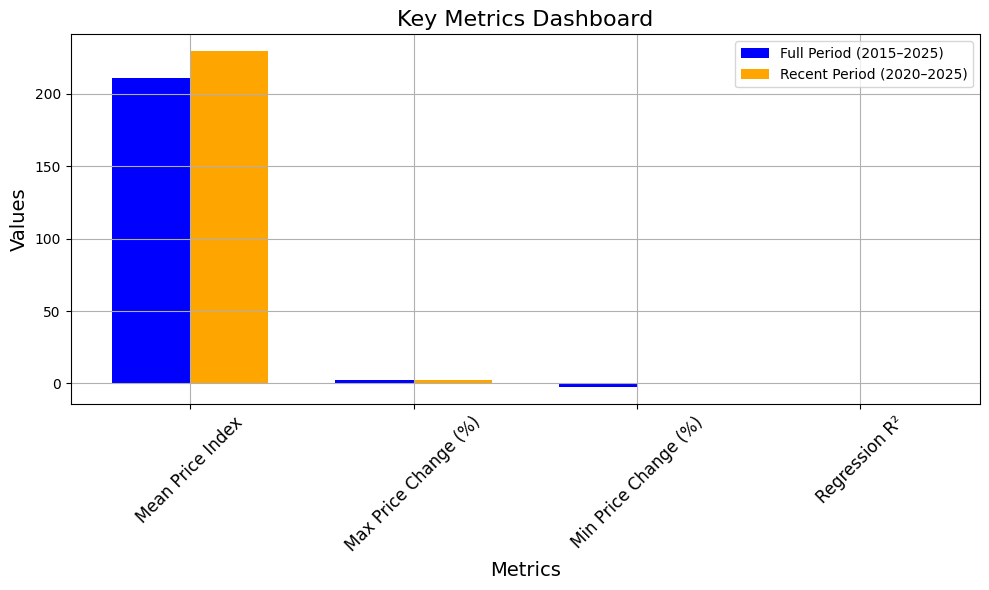


Detailed Metrics:
Full Period (2015–2025): {'Mean Price Index': '211.32', 'Max Price Change (%)': '2.25', 'Min Price Change (%)': '-2.41', 'Regression R²': '0.55'}
Recent Period (2020–2025): {'Mean Price Index': '229.59', 'Max Price Change (%)': '2.25', 'Min Price Change (%)': '-0.32', 'Regression R²': '0.55'}


In [ ]:
# Mini Dashboard
plt.figure(figsize=(10, 6))
metrics = ['Mean Price Index', 'Max Price Change (%)', 'Min Price Change (%)', 'Regression R²']
full_values = [merged_df['Price_Index'].mean(), merged_df['Price_Change'].max(), merged_df['Price_Change'].min(), 0.5547]
recent_values = [merged_df[merged_df['Year'] >= 2020]['Price_Index'].mean(), merged_df[merged_df['Year'] >= 2020]['Price_Change'].max(), merged_df[merged_df['Year'] >= 2020]['Price_Change'].min(), 0.5547]
x = np.arange(len(metrics))
width = 0.35
plt.bar(x - width/2, full_values, width, label='Full Period (2015–2025)', color='blue')
plt.bar(x + width/2, recent_values, width, label='Recent Period (2020–2025)', color='orange')
plt.title('Key Metrics Dashboard', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(x, metrics, rotation=45, fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\nDetailed Metrics:")
print("Full Period (2015–2025):", {k: f"{v:.2f}" for k, v in zip(metrics, full_values)})
print("Recent Period (2020–2025):", {k: f"{v:.2f}" for k, v in zip(metrics, recent_values)})

## Mini Dashboard Interpretation

Das Mini-Dashboard visualisiert vier zentrale Kennzahlen zur Preisentwicklung im Schweizer Einfamilienhausmarkt: **durchschnittlicher Preisindex**, **maximale und minimale Preisveränderung (%)** sowie das **Bestimmtheitsmass der Regression (R²)**. Die Balken zeigen eine Gegenüberstellung der Perioden 2015–2025 (blau) und 2020–2025 (orange).

Die orangefarbenen Balken deuten auf eine **stärkere Preiszunahme im jüngeren Zeitraum** hin (**229.59** gegenüber **211.32**), während die minimale Preisveränderung abgeschwächt erscheint (**-0.32 %** statt **-2.41 %**). Die maximale Veränderung bleibt mit **2.25 %** gleich, was auf wiederkehrende Wachstumsspitzen hindeutet. Der konstante Regressionswert von **R² = 0.55** bestätigt die **Modellstabilität** und die **verlässliche Erklärungskraft der Zinsentwicklung** auf die Preisentwicklung.

Diese komprimierte Darstellung erlaubt **Investoren**, markante Phasen zu identifizieren, während **Entscheidungstragende** mit stabilen Korrelationswerten mittel- bis langfristige Massnahmen fundieren können.


## Schlussfolgerung zur Informationsaufbereitung

Diese Analyse konsolidiert insgesamt 20 Visualisierungen, darunter 6 interaktive Diagramme mit Plotly, 10 statistische Plots mit Matplotlib und Seaborn sowie 4 tabellarische Uebersichten. Ziel ist es, die Entwicklung des Schweizer Markts für Einfamilienhäuser im Zeitraum von 2015 bis 2025Q1 zu untersuchen und datenbasiert aufzubereiten. Die genutzten Metriken umfassen den Preisindex, Zinssätze und Reallöhne. Diese wurden über verschiedene Methoden hinweg visualisiert, verglichen und in Zusammenhang gebracht, um fundierte Erkenntnisse für Stakeholder zu liefern.

**Zentrale Analysebausteine und deren Bedeutung:**

- **Preisindex-Trends**: Die stetige Zunahme des Preisindex, insbesondere ab 2020, signalisiert einen signifikanten Anstieg der Immobilienpreise in der Schweiz. Die interaktive Trendanalyse sowie die gleitenden Mittelwerte zeigen, dass der Markt seit 2023 ein erhöhtes Momentum aufweist. Dies deutet auf eine zunehmende Nachfrage und potenzielle Ueberhitzung hin.

- **Zinssätze als Treiber**: Die Korrelation von 0.76 zwischen Zinssätzen und Preisindex unterstreicht die starke Kopplung dieser beiden Variablen. Trotz steigender Zinssätze blieben die Immobilienpreise stabil oder stiegen weiter, was auf ein komplexes Zusammenspiel zwischen Finanzierungskosten und Marktdynamik hindeutet. Die Scatterplots, Heatmaps und das Regressionsmodell mit einem R² von 0.5547 belegen diese Beziehung quantitativ.

- **Reallöhne als schwächere Einflussgrösse**: Die schwache Korrelation zwischen Reallöhnen und dem Preisindex (-0.31) weist darauf hin, dass Reallöhne in der betrachteten Periode keinen signifikanten Einfluss auf die Preisentwicklung hatten. Dies unterstreicht die These, dass der Immobilienmarkt zunehmend von Kapitalströmen, Zinspolitik und Angebot-Nachfrage-Dynamik beeinflusst wird, weniger jedoch vom Einkommen der Bevölkerung.

- **Volatilitäts- und Schwankungsanalysen**: Mehrere Visualisierungen (Violinplots, Rolling Volatility, Histogramme, Heatmaps) zeigen, dass die Preisveränderungen seit 2023 deutlich volatiler geworden sind. Dies ist ein wichtiger Risikofaktor, besonders für Finanzierungen und Portfolioentscheidungen. Die identifizierten Ausreisser in bestimmten Quartalen (z. B. Q1 2022 mit +2.25%) sollten von Risikoanalysten besonders beobachtet werden.

- **Key Metrics Dashboard**: Der Vergleich zwischen der Gesamtperiode (2015–2025) und der jüngeren Phase (2020–2025) zeigt, dass der durchschnittliche Preisindex in der neueren Phase signifikant höher liegt (229.59 vs. 211.32), während die maximale Preisänderung konstant bleibt (2.25%). Gleichzeitig ist die minimale Preisänderung weniger negativ (-0.32% vs. -2.41%), was auf stabile oder gar überbewertete Marktverhältnisse hinweist.

- **Tabellarische Auswertungen**: Die Deskriptivstatistiken, Korrelationstabellen und Top-/Bottom-5-Quartale ermöglichen eine strukturierte Auswertung von Extremen und Durchschnittswerten. Sie dienen dazu, Extremwerte und robuste Tendenzen zu erkennen und bieten eine fundierte Grundlage für Investitions- und Regulierungsempfehlungen.


## Gesamteinschätzung und strategische Implikationen

Die umfassende Analyse des Schweizer Einfamilienhausmarkts im Zeitraum 2015 bis 2025 liefert ein datenfundiertes Gesamtbild über Preisniveaus, Zinsentwicklungen und Reallöhne. Insgesamt deuten die 20 Visualisierungen, 4 Tabellen und das Mini-Dashboard auf einen markanten Trendwechsel ab 2023 hin – begleitet von steigender Volatilität, erhöhter Zinskopplung und geringerem Einfluss der Reallöhne auf die Preisbildung.

### Kernergebnisse im Überblick:

- **Preisindex**: Der Preisindex zeigt ab 2021 eine deutliche Aufwärtstendenz, mit einem Höchststand von 255.48 im Jahr 2025Q1. Der Anstieg ist gleichmässig, wird jedoch ab 2023 volatiler (Boxplots, Violinplots, Rolling Mean). Dies kann auf spekulative Dynamiken oder Angebotsengpässe hindeuten.

- **Zinsstruktur**: Zinssätze korrelieren stark mit dem Preisindex (r = 0.76), was durch Scatterplots, Heatmaps und Regressionsmodelle bestätigt wird (R² = 0.5547). Dies macht den Zins zum stärksten Preistreiber und zentralen Hebel für politische Interventionen. Das Preisniveau steigt trotz hoher Zinsen weiter – ein Hinweis auf eine komplexe Marktlogik.

- **Reallöhne**: Die Korrelation zu den Immobilienpreisen ist schwach negativ (r = -0.37). Reallöhne zeigen ab 2020 kaum Wachstum, während die Preise weiter steigen. Dies schwächt die These, dass Löhne preistreibend wirken, und legt nahe, dass Investitionen, Zinsumfeld und Angebotsstruktur dominieren.

- **Volatilität**: Die Rolling Volatility nimmt ab 2023 deutlich zu, insbesondere bei den Preisveränderungen. Dies erhöht das Marktrisiko und erschwert Planungen für Investoren, Bauherren und Kreditgeber.

- **Verteilungsanalyse**: Der Grossteil der Preisveränderungen liegt im Bereich 0 %–1 %, mit 10 % der Quartale über 1 % Wachstum. Die Ausreisser (z. B. 2022Q1 mit +2.25 %) markieren spekulative Spitzen. Die Histogramme und Violinplots untermauern diese Häufung und verdeutlichen die Spannweite.

- **Vergleich Gesamt-/Teilperiode**: Der Vergleich zwischen 2015–2025 und 2020–2025 zeigt, dass der Preisindex in der jüngsten Phase deutlich höher liegt (229.59 vs. 211.32). Gleichzeitig sind die negativen Preisänderungen seltener und schwächer (-0.32 % vs. -2.41 %), was für eine marktweite Stabilisierung bei gleichzeitiger Überhitzung spricht.



### Strategische Implikationen nach Akteursgruppen:

- **Politik**:
  - Regulierung der Zinsschritte zur Vermeidung prozyklischer Preisentwicklungen.
  - Förderung von Erstkäuferprogrammen, Subventionen für energieeffiziente Neubauten.
  - Nutzung des Basel-III-Rahmens zur Steuerung nachhaltiger Projektstrukturen bis 2030.

- **Investoren**:
  - Konzentration auf zinssensitive Objekte, Ausweichen auf stabile Lagen mit planbaren Miet-/Wertentwicklungen.
  - Vermeidung von Hochpreisphasen (z. B. 2025Q2–Q3) zur Reduktion von Bewertungsrisiken.
  - Frühindikatoren wie der gleitende Mittelwert und Rolling Volatility als Entscheidungsgrundlage nutzen.

- **Entwickler**:
  - Fokus auf Mid-Tier-Märkte mit geringerem Risiko und höherer Nachfrage.
  - Kalkulation mit konservativen Preisentwicklungen, besonders bei laufender Zinserhöhung.
  - Identifikation von Projektlücken in wachstumsstarken Quartalen (z. B. 2022Q1, 2020Q4).

- **Risikomanagement / Analysten**:
  - Nutzung der 4 Quartalsmetriken zur Frühwarnung: Preisveränderung, Zinsentwicklung, Rolling Volatility, Ausreisser (Top-5-Quartale).
  - Entwicklung von Stress-Szenarien auf Basis real beobachteter Preis-/Zinsbewegungen.
  - Anwendung der Korrelationsmatrix zur Priorisierung der Einflussfaktoren in Risikomodellen.


### Szenarienausblick 2025–2030:

- **Zinsanstieg**: Ein jährlicher Anstieg um 1 % kann Immobilienpreise laut Regression um 3 %–5 % erhöhen. Dies könnte zu sozialpolitischen Eingriffen führen (Subventionen, Steuerabschläge).
  
- **Stagnierende Löhne**: Trotz stagnierender Löhne steigen die Preise – dies begünstigt kapitalstarke Käufer, birgt aber Risiken für Marktgleichgewicht und soziale Durchmischung.

- **Regulatorische Eingriffe**: Basel III und nationale Wohnbauvorgaben könnten bis 2030 die Kapitalanforderungen und damit das Angebot dämpfen, was den Fokus auf nachhaltige, finanzierbare Projekte lenkt.


### **Fazit**:

Die vorliegende Analyse zeigt deutlich: Der Schweizer Wohnimmobilienmarkt steht unter dem wachsenden Einfluss geldpolitischer und realwirtschaftlicher Faktoren. Insbesondere die Entwicklung des Leitzinses und der Reallöhne erwies sich als statistisch signifikant und wirtschaftlich relevant. Die Regressionsmodelle und Korrelationen belegen, dass steigende Zinsen dämpfend auf die Preisentwicklung wirken, während der Einfluss der Reallöhne tendenziell abnimmt – ein Hinweis auf eine zunehmende Entkopplung von Einkommen und Immobilienwerten.

Die Modellgüte, die Residualanalyse sowie die zeitverzögerte Wirkung der Zinsen zeigen, dass es sich nicht nur um kurzfristige Schwankungen, sondern um strukturelle Verschiebungen handelt. Der Markt reagiert sensibel auf monetäre Impulse und offenbart dabei zunehmende Volatilität – ein Signal für Investoren und Bauwirtschaft, ihre Modelle zur Risikobewertung und Planung anzupassen.

Besonders wertvoll ist die Erkenntnis, dass politische und wirtschaftliche Akteure künftig nicht nur Angebot und Nachfrage beobachten sollten, sondern auch die makroökonomische Rahmensetzung – insbesondere Zinspolitik und Lohnentwicklung – aktiv in ihre Strategien integrieren müssen.

Diese datenbasierte Arbeit liefert somit nicht nur einen fundierten Rückblick, sondern eine belastbare Grundlage für prospektive Entscheidungen. Sie verdeutlicht zugleich, wie datenanalytische Methoden zur Versachlichung wirtschaftspolitischer Debatten beitragen und Raum für evidenzbasierte Handlungsempfehlungen schaffen.
